## 1. Biblioteki

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import os
import talos as ta
from talos.model.early_stopper import early_stopper

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error
%load_ext tensorboard


from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

from sklearn.model_selection import train_test_split


Using TensorFlow backend.



## 2. Dane

In [55]:
train_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_train.csv')
test_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_test.csv')
val_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_val.csv')

train_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
test_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
val_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']

caly_df = pd.concat([train_df, test_df, val_df])
caly_df['Województwo']=caly_df['Województwo'].astype('category')
caly_df['Data urodzenia']=caly_df['Data urodzenia'].astype('category')

del caly_df["id"]
del caly_df["PF"]
del caly_df["Dokł. IE"]
del caly_df['kategoria']

caly_df.shape

(1881, 27)

In [56]:
caly_df.head()

,Województwo,Data urodzenia,IE,PI-PROD,PI-POKR,Prc,Psm,Pnr,Pw,PI-PLOD,...,kg ml,kg tł,% tł,kg bi,% bi,rc,sm,nr,w,og
0,WIELKOPOLSKIE,2020,2120,137,127,121,113,106,128,109,...,1370,577,2,452,1,115.0,114.0,109.0,127.0,123.0
1,KUJAWSKO-POMORSKIE,2018,1912,126,123,109,113,103,128,114,...,1209,358,-16,354,-4,115.0,113.0,104.0,123.0,123.0
2,POMORSKIE,2020,2126,126,120,110,107,102,124,113,...,982,368,-4,350,4,104.0,103.0,102.0,122.0,117.0
3,KUJAWSKO-POMORSKIE,2020,2089,133,111,104,110,99,114,114,...,1080,546,12,410,7,106.0,106.0,101.0,112.0,112.0
4,ZACHODNIOPOMORSKIE,2020,2853,125,115,91,95,101,124,134,...,516,501,36,289,15,102.0,102.0,118.0,123.0,109.0


In [57]:
caly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 188
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Województwo     1881 non-null   category
 1   Data urodzenia  1881 non-null   category
 2   IE              1881 non-null   int64   
 3   PI-PROD         1881 non-null   int64   
 4   PI-POKR         1881 non-null   int64   
 5   Prc             1881 non-null   int64   
 6   Psm             1881 non-null   int64   
 7   Pnr             1881 non-null   int64   
 8   Pw              1881 non-null   int64   
 9   PI-PLOD         1881 non-null   int64   
 10  CRj             1881 non-null   int64   
 11  CRk             1881 non-null   int64   
 12  PP              1881 non-null   int64   
 13  OMC             1881 non-null   int64   
 14  WH-KSOM         1881 non-null   int64   
 15  WH-DLUG         1881 non-null   int64   
 16  IP              1881 non-null   int64   
 17  kg ml          

## 3. Usuwam mniejszości zmiennych kategorycznych

In [58]:
caly_df['Województwo'].value_counts()

WIELKOPOLSKIE          579
KUJAWSKO-POMORSKIE     298
OPOLSKIE               227
ZACHODNIOPOMORSKIE     212
PODLASKIE              175
MAZOWIECKIE            106
POMORSKIE               94
LUBUSKIE                47
ŁÓDZKIE                 41
DOLNOŚLĄSKIE            32
WARMIŃSKO-MAZURSKIE     23
ŚLĄSKIE                 17
ŚWIĘTOKRZYSKIE          13
MAŁOPOLSKIE             12
LUBELSKIE                4
PODKARPACKIE             1
Name: Województwo, dtype: int64

In [59]:
caly_df=caly_df[caly_df['Województwo']!='PODKARPACKIE']
caly_df=caly_df[caly_df['Województwo']!='LUBELSKIE']

In [60]:
caly_df['Województwo'].value_counts()

WIELKOPOLSKIE          579
KUJAWSKO-POMORSKIE     298
OPOLSKIE               227
ZACHODNIOPOMORSKIE     212
PODLASKIE              175
MAZOWIECKIE            106
POMORSKIE               94
LUBUSKIE                47
ŁÓDZKIE                 41
DOLNOŚLĄSKIE            32
WARMIŃSKO-MAZURSKIE     23
ŚLĄSKIE                 17
ŚWIĘTOKRZYSKIE          13
MAŁOPOLSKIE             12
LUBELSKIE                0
PODKARPACKIE             0
Name: Województwo, dtype: int64

In [61]:
caly_df['Data urodzenia'].value_counts()

2020    1066
2019     396
2018     275
2017      68
2021      47
2016      23
2015       1
Name: Data urodzenia, dtype: int64

In [62]:
caly_df=caly_df[caly_df['Data urodzenia']!=2015]

In [63]:
caly_df['Data urodzenia'].value_counts()

2020    1066
2019     396
2018     275
2017      68
2021      47
2016      23
2015       0
Name: Data urodzenia, dtype: int64

In [64]:
caly_df.shape

(1875, 27)

## 4. Zakodowuje zmienne kategoryczne

In [65]:
a=pd.get_dummies(caly_df['Województwo'])
b=pd.get_dummies(caly_df['Data urodzenia'])
caly_df= pd.concat([caly_df,a,b], axis=1)
del caly_df['Województwo']
del caly_df['Data urodzenia']

## 5. Klasyfikuje wartosci IE

(array([103.,  85.,  60.,  56., 283., 350., 264., 195.,  96.,  78.,  67.,
         47.,  44.,  37.,  24.,  23.,  19.,   6.,  10.,  10.,   2.,   7.,
          3.,   1.,   2.,   1.,   1.,   0.,   0.,   1.]),
 array([1903.        , 1945.06666667, 1987.13333333, 2029.2       ,
        2071.26666667, 2113.33333333, 2155.4       , 2197.46666667,
        2239.53333333, 2281.6       , 2323.66666667, 2365.73333333,
        2407.8       , 2449.86666667, 2491.93333333, 2534.        ,
        2576.06666667, 2618.13333333, 2660.2       , 2702.26666667,
        2744.33333333, 2786.4       , 2828.46666667, 2870.53333333,
        2912.6       , 2954.66666667, 2996.73333333, 3038.8       ,
        3080.86666667, 3122.93333333, 3165.        ]),
 <BarContainer object of 30 artists>)

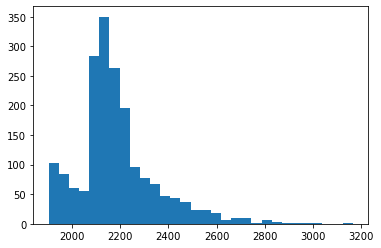

In [66]:
plt.hist(caly_df["IE"],bins=30)

In [67]:
caly_df["IE"].describe()

count    1875.000000
mean     2186.410133
std       166.883876
min      1903.000000
25%      2096.000000
50%      2156.000000
75%      2243.000000
max      3165.000000
Name: IE, dtype: float64

In [68]:
caly_df.loc[(caly_df["IE"]<=2096), "Klasa"] = "Małe"
caly_df.loc[(2096<caly_df["IE"]) & (caly_df["IE"]<=2156), "Klasa"] = "Średnie"
caly_df.loc[(2156<caly_df["IE"]) & (caly_df["IE"]<=2243), "Klasa"] = "Wysokie"
caly_df.loc[caly_df["IE"]>2243, "Klasa"] = "Ekstrimum"

(array([475.,   0.,   0., 470.,   0.,   0., 466.,   0.,   0., 464.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

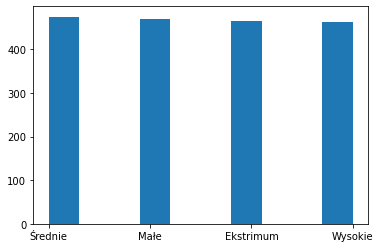

In [69]:
plt.hist(caly_df["Klasa"])

In [70]:
caly_df["Klasa"].value_counts()

Średnie      475
Małe         470
Ekstrimum    466
Wysokie      464
Name: Klasa, dtype: int64

In [74]:
list(caly_df)

['IE',
 'PI-PROD',
 'PI-POKR',
 'Prc',
 'Psm',
 'Pnr',
 'Pw',
 'PI-PLOD',
 'CRj',
 'CRk',
 'PP',
 'OMC',
 'WH-KSOM',
 'WH-DLUG',
 'IP',
 'kg ml',
 'kg tł',
 '% tł',
 'kg bi',
 '% bi',
 'rc',
 'sm',
 'nr',
 'w',
 'og',
 'DOLNOŚLĄSKIE',
 'KUJAWSKO-POMORSKIE',
 'LUBELSKIE',
 'LUBUSKIE',
 'MAZOWIECKIE',
 'MAŁOPOLSKIE',
 'OPOLSKIE',
 'PODKARPACKIE',
 'PODLASKIE',
 'POMORSKIE',
 'WARMIŃSKO-MAZURSKIE',
 'WIELKOPOLSKIE',
 'ZACHODNIOPOMORSKIE',
 'ŁÓDZKIE',
 'ŚLĄSKIE',
 'ŚWIĘTOKRZYSKIE',
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 'Klasa']

In [86]:
train_df, test_df = train_test_split(caly_df, test_size=0.2, random_state=42,stratify=caly_df['Klasa'])
#test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=42,stratify=test_df['Klasa'])

del train_df['Klasa']
del test_df['Klasa']
#del val_df['Klasa']


train_label=train_df['IE']
test_label=test_df['IE']
#val_label=val_df['IE']

del train_df['IE']
del test_df['IE']
#del val_df['IE']


In [87]:
list(train_df)

['PI-PROD',
 'PI-POKR',
 'Prc',
 'Psm',
 'Pnr',
 'Pw',
 'PI-PLOD',
 'CRj',
 'CRk',
 'PP',
 'OMC',
 'WH-KSOM',
 'WH-DLUG',
 'IP',
 'kg ml',
 'kg tł',
 '% tł',
 'kg bi',
 '% bi',
 'rc',
 'sm',
 'nr',
 'w',
 'og',
 'DOLNOŚLĄSKIE',
 'KUJAWSKO-POMORSKIE',
 'LUBELSKIE',
 'LUBUSKIE',
 'MAZOWIECKIE',
 'MAŁOPOLSKIE',
 'OPOLSKIE',
 'PODKARPACKIE',
 'PODLASKIE',
 'POMORSKIE',
 'WARMIŃSKO-MAZURSKIE',
 'WIELKOPOLSKIE',
 'ZACHODNIOPOMORSKIE',
 'ŁÓDZKIE',
 'ŚLĄSKIE',
 'ŚWIĘTOKRZYSKIE',
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [88]:
len(list(train_df))

47

## 1.2 Standaryzacja

In [89]:
train_df.iloc[:,:24]

,PI-PROD,PI-POKR,Prc,Psm,Pnr,Pw,PI-PLOD,CRj,CRk,PP,...,kg ml,kg tł,% tł,kg bi,% bi,rc,sm,nr,w,og
974,130,111,126,117,100,108,118,116,120,98,...,980,380,-2,417,12,113.0,110.0,103.0,108.0,117.0
84,135,109,116,108,104,106,120,119,117,96,...,1263,521,0,446,4,108.0,105.0,110.0,108.0,108.0
753,137,121,121,116,120,110,101,101,100,101,...,1237,666,18,419,2,118.0,115.0,126.0,108.0,121.0
643,117,125,101,103,114,127,123,115,130,114,...,723,305,1,227,-1,102.0,101.0,124.0,127.0,117.0
1438,133,109,104,113,102,108,112,111,116,98,...,1254,485,-3,425,2,108.0,108.0,116.0,111.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,125,118,117,112,100,119,110,108,113,102,...,845,467,14,307,4,110.0,108.0,101.0,118.0,118.0
650,143,129,116,115,115,126,117,115,119,100,...,1448,694,11,509,4,113.0,109.0,122.0,126.0,125.0
732,135,121,107,115,105,123,105,104,104,104,...,1113,561,12,437,9,107.0,109.0,109.0,119.0,123.0
1226,128,124,104,108,110,127,106,103,109,109,...,1111,407,-5,380,2,105.0,103.0,118.0,128.0,120.0


In [90]:
scaler = StandardScaler()
train_df.iloc[:,:24]=scaler.fit_transform(train_df.iloc[:,:24])
test_df.iloc[:,:24]=scaler.fit_transform(test_df.iloc[:,:24])
#val_df.iloc[:,14:]=scaler.fit_transform(val_df.iloc[:,14:])

In [91]:
train_df.iloc[:,20:29]

,sm,nr,w,og,DOLNOŚLĄSKIE,KUJAWSKO-POMORSKIE,LUBELSKIE,LUBUSKIE,MAZOWIECKIE
974,0.891719,-1.253508,-1.582152,0.297493,0,0,0,0,0
84,-0.188542,-0.294750,-1.582152,-1.048403,0,0,0,0,0
753,1.971980,1.896698,-1.582152,0.895669,0,0,0,0,0
643,-1.052750,1.622767,1.088977,0.297493,0,0,0,0,0
1438,0.459615,0.527043,-1.160395,-0.450227,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
143,0.459615,-1.527439,-0.176295,0.447037,0,0,0,0,0
650,0.675667,1.348836,0.948391,1.493845,0,0,0,0,0
732,0.675667,-0.431715,-0.035709,1.194757,0,0,0,0,0
1226,-0.620646,0.800974,1.229563,0.746125,0,0,0,0,0


In [92]:
train_df.shape

(1500, 47)

In [93]:
test_df.shape

(375, 47)

In [94]:
train_df = np.array(train_df)
test_df = np.array(test_df)

In [95]:
train_df

array([[ 0.45476225, -0.93083361,  2.37267516, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.23222221, -1.21598635,  1.10580699, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.5432062 ,  0.49493011,  1.73924108, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.23222221,  0.49493011, -0.03437436, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.14377826,  0.92265923, -0.41443481, ...,  0.        ,
         1.        ,  0.        ],
       [-0.94466569, -0.36052812,  1.23249381, ...,  1.        ,
         0.        ,  0.        ]])

In [96]:
train_label = np.array(train_label)
test_label = np.array(test_label)

In [97]:
train_label

array([2085, 2142, 2037, ..., 2128, 2096, 2058], dtype=int64)

In [98]:
METRICS=['mae']

# 2 Moduł TALOS

Zamiast dobierać wszystkie hiperparametry na nowo, sprawdzę czy siec preferuje inne w waskim zakresie

## 2.1 Słownik parametrów do wypróbowania

In [101]:
p = {'first_neuron':[160,320], #
     'hidden_neuron':[50,100],#
     'hidden_layers':[1,2],  #
     'batch_size': [32,64], #
     'optimizer': ['adam'],# do zrobienia potem
     'kernel_initializer': ['normal'], # do zrobienia potem
     'epochs': [2000], # never touch it
     'dropout': [0],  # po dopasowaniu znowu nie bedzie potrzebne
     'activation_layer':['relu'], # do zrobienia potem
     'batc_normalization':[False], # do zrobienia potem
     'last_activation': ['linear']} #never touch it
#     'optimizer': ['rmsprop','adam','adadelta','adamax','nadam','adagrad'],
#     'kernel_initializer': ['orthogonal','identity','zeros','ones','uniform'],
#    'activation_layer':['sigmoid','tanh','selu','elu','relu'],

## 2.2 Tworzę funkcję do tworzenia instancji modelu keras

In [102]:
def numerai_model(x_train, y_train, x_val, y_val, params):
    print(params)

    model = Sequential()
    
    ## initial layer
    model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1],
                    activation='relu',
                    kernel_initializer = params['kernel_initializer'] ))
    if params['batc_normalization']==True:
        model.add(BatchNormalization())
    model.add(Dropout(params['dropout']))
    
    ## hidden layers
    for i in range(params['hidden_layers']):
        print (f"adding layer {i+1}")
        model.add(Dense(params['hidden_neuron'], activation='relu',
                    kernel_initializer=params['kernel_initializer']))
        if params['batc_normalization']==True:
            model.add(BatchNormalization())
        model.add(Dropout(params['dropout']))
    
    
    ## final layer
    model.add(Dense(1, activation=params['last_activation'],
                    kernel_initializer=params['kernel_initializer']))
    
    model.compile(loss='mean_absolute_error', 
                  optimizer=params['optimizer'])
    
    history = model.fit(x_train, y_train, 
                        validation_data=[x_val, y_val],
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        callbacks = [early_stopper(params['epochs'], patience=10,monitor='val_loss')] #,ta.live(),
                        )

    return history, model

## 2.3 Przeprowadzam skan, używając parametrów i funkcji wyżej


In [103]:
t = ta.Scan(x=train_df, y=train_label,
            x_val=test_df, y_val=test_label,
            model=numerai_model,
            params=p,
            experiment_name='Predykcja IE')

  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 32, 'dropout': 0, 'epochs': 2000, 'first_neuron': 160, 'hidden_layers': 1, 'hidden_neuron': 50, 'kernel_initializer': 'normal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 2s 1ms/sample - loss: 2184.5754 - val_loss: 2181.2981
Epoch 2/2000
1500/1500 [==============================] - 0s 62us/sample - loss: 2162.0041 - val_loss: 2130.1087
Epoch 3/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 2053.1653 - val_loss: 1944.8225
Epoch 4/2000
1500/1500 [==============================] - 0s 35us/sample - loss: 1757.5706 - val_loss: 1521.2986
Epoch 5/2000
1500/1500 [==============================] - 0s 35us/sample - loss: 1191.9752 - val_loss: 869.0474
Epoch 6/2000
1500/1500 [==============================] - 0s 34us/sample - loss: 702.4650 - val_loss: 607.1395
Epoch 7/2000
1

1500/1500 [==============================] - 0s 36us/sample - loss: 20.5501 - val_loss: 23.6119
Epoch 147/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 20.8181 - val_loss: 23.5835
Epoch 148/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 21.0566 - val_loss: 23.5770
Epoch 149/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 20.6141 - val_loss: 23.5444
Epoch 150/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 20.5431 - val_loss: 25.4720
Epoch 151/2000
1500/1500 [==============================] - 0s 35us/sample - loss: 20.9935 - val_loss: 25.0805
Epoch 152/2000
1500/1500 [==============================] - 0s 34us/sample - loss: 20.5030 - val_loss: 23.6766
Epoch 153/2000
1500/1500 [==============================] - 0s 34us/sample - loss: 20.8794 - val_loss: 23.4154
Epoch 154/2000
1500/1500 [==============================] - 0s 35us/sample - loss: 20.8365 - val_loss: 24.2369
Epoch 155/2000
1

Epoch 220/2000
1500/1500 [==============================] - 0s 36us/sample - loss: 20.2118 - val_loss: 22.4062
Epoch 221/2000
1500/1500 [==============================] - 0s 36us/sample - loss: 20.2470 - val_loss: 23.6366
Epoch 222/2000
1500/1500 [==============================] - 0s 36us/sample - loss: 20.1349 - val_loss: 24.1653
Epoch 223/2000
1500/1500 [==============================] - 0s 35us/sample - loss: 20.4451 - val_loss: 22.9222
Epoch 224/2000
1500/1500 [==============================] - 0s 35us/sample - loss: 20.5721 - val_loss: 22.3789
Epoch 225/2000
1500/1500 [==============================] - 0s 35us/sample - loss: 20.3954 - val_loss: 24.5249
Epoch 226/2000
1500/1500 [==============================] - 0s 35us/sample - loss: 20.3478 - val_loss: 23.2150
Epoch 227/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 19.9841 - val_loss: 23.5165
Epoch 228/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 21.5139 - val_loss: 23.5570
E

Epoch 294/2000
1500/1500 [==============================] - 0s 35us/sample - loss: 19.7913 - val_loss: 23.3050
Epoch 295/2000
1500/1500 [==============================] - 0s 35us/sample - loss: 20.1578 - val_loss: 23.5849
Epoch 296/2000
1500/1500 [==============================] - 0s 36us/sample - loss: 19.7997 - val_loss: 23.2061
Epoch 297/2000
1500/1500 [==============================] - 0s 36us/sample - loss: 20.3948 - val_loss: 24.2981
Epoch 298/2000
1500/1500 [==============================] - 0s 36us/sample - loss: 19.6333 - val_loss: 23.4277
Epoch 299/2000
1500/1500 [==============================] - 0s 35us/sample - loss: 19.7454 - val_loss: 23.5680
Epoch 300/2000
1500/1500 [==============================] - 0s 35us/sample - loss: 20.1592 - val_loss: 23.8928
Epoch 301/2000
1500/1500 [==============================] - 0s 35us/sample - loss: 20.2049 - val_loss: 23.5050
Epoch 302/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 19.2294 - val_loss: 23.0486
E

Epoch 368/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 19.3521 - val_loss: 24.3127
Epoch 369/2000
1500/1500 [==============================] - 0s 45us/sample - loss: 19.1135 - val_loss: 23.7089
Epoch 370/2000
1500/1500 [==============================] - 0s 36us/sample - loss: 19.1400 - val_loss: 24.0147
Epoch 371/2000
1500/1500 [==============================] - 0s 36us/sample - loss: 19.3873 - val_loss: 22.2134
Epoch 372/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 19.0695 - val_loss: 22.4890
Epoch 373/2000
1500/1500 [==============================] - 0s 43us/sample - loss: 19.6919 - val_loss: 24.5013
Epoch 374/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 19.7804 - val_loss: 22.8015
Epoch 375/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 19.3034 - val_loss: 21.8482
Epoch 376/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 19.0849 - val_loss: 24.8147
E

Epoch 442/2000
1500/1500 [==============================] - 0s 33us/sample - loss: 18.8611 - val_loss: 23.9027
Epoch 443/2000
1500/1500 [==============================] - 0s 35us/sample - loss: 18.9277 - val_loss: 23.4122


  6%|█████▏                                                                             | 1/16 [00:27<06:58, 27.93s/it]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 32, 'dropout': 0, 'epochs': 2000, 'first_neuron': 160, 'hidden_layers': 1, 'hidden_neuron': 100, 'kernel_initializer': 'normal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 246us/sample - loss: 2182.4721 - val_loss: 2173.1203
Epoch 2/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 2126.0195 - val_loss: 2043.2089
Epoch 3/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 1849.9483 - val_loss: 1571.8320
Epoch 4/2000
1500/1500 [==============================] - 0s 42us/sample - loss: 1145.4059 - val_loss: 738.4808
Epoch 5/2000
1500/1500 [==============================] - 0s 35us/sample - loss: 620.5928 - val_loss: 535.4878
Epoch 6/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 513.4521 - val_loss: 454.5717
Epoch 7/2000


1500/1500 [==============================] - 0s 41us/sample - loss: 20.4795 - val_loss: 23.0477
Epoch 147/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 21.3537 - val_loss: 22.3688
Epoch 148/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 20.2122 - val_loss: 23.2224
Epoch 149/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 21.1437 - val_loss: 22.7086
Epoch 150/2000
1500/1500 [==============================] - 0s 36us/sample - loss: 21.1090 - val_loss: 23.4026
Epoch 151/2000
1500/1500 [==============================] - 0s 42us/sample - loss: 20.7343 - val_loss: 25.3248
Epoch 152/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 20.9546 - val_loss: 24.7157
Epoch 153/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 20.3797 - val_loss: 23.6211
Epoch 154/2000
1500/1500 [==============================] - 0s 36us/sample - loss: 20.7021 - val_loss: 22.2430
Epoch 155/2000
1

Epoch 220/2000
1500/1500 [==============================] - 0s 42us/sample - loss: 20.3230 - val_loss: 23.9217
Epoch 221/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 19.7975 - val_loss: 22.5351
Epoch 222/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 20.8600 - val_loss: 25.6370
Epoch 223/2000
1500/1500 [==============================] - 0s 48us/sample - loss: 20.3684 - val_loss: 24.6174
Epoch 224/2000
1500/1500 [==============================] - 0s 43us/sample - loss: 20.5250 - val_loss: 23.0807
Epoch 225/2000
1500/1500 [==============================] - 0s 45us/sample - loss: 19.6772 - val_loss: 21.9825
Epoch 226/2000
1500/1500 [==============================] - 0s 50us/sample - loss: 20.4384 - val_loss: 23.2590
Epoch 227/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 19.8776 - val_loss: 22.7623
Epoch 228/2000
1500/1500 [==============================] - 0s 49us/sample - loss: 19.3731 - val_loss: 23.5882
E

Epoch 294/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 20.7656 - val_loss: 23.5127
Epoch 295/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 19.2476 - val_loss: 22.9888
Epoch 296/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 19.3935 - val_loss: 23.5600
Epoch 297/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 19.5851 - val_loss: 22.7081
Epoch 298/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 19.5743 - val_loss: 23.9764
Epoch 299/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 19.0709 - val_loss: 22.4250
Epoch 300/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 19.3168 - val_loss: 23.5250
Epoch 301/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 19.6168 - val_loss: 24.2230
Epoch 302/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 19.7117 - val_loss: 22.4455
E

Epoch 368/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 20.0418 - val_loss: 23.6415
Epoch 369/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 20.2414 - val_loss: 23.0068
Epoch 370/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 19.5229 - val_loss: 22.9525
Epoch 371/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 19.4005 - val_loss: 23.8264
Epoch 372/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 18.5082 - val_loss: 22.7885
Epoch 373/2000
1500/1500 [==============================] - 0s 35us/sample - loss: 19.5683 - val_loss: 24.7405
Epoch 374/2000
1500/1500 [==============================] - 0s 35us/sample - loss: 18.9681 - val_loss: 22.4220
Epoch 375/2000
1500/1500 [==============================] - 0s 36us/sample - loss: 18.4285 - val_loss: 24.9030
Epoch 376/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 19.9887 - val_loss: 25.1009


 12%|██████████▍                                                                        | 2/16 [00:51<05:53, 25.23s/it]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 32, 'dropout': 0, 'epochs': 2000, 'first_neuron': 160, 'hidden_layers': 2, 'hidden_neuron': 50, 'kernel_initializer': 'normal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
adding layer 2
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 268us/sample - loss: 2183.2588 - val_loss: 2170.9848
Epoch 2/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 2038.3265 - val_loss: 1715.7546
Epoch 3/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 971.8142 - val_loss: 547.5203
Epoch 4/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 511.2818 - val_loss: 402.1773
Epoch 5/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 361.5013 - val_loss: 286.8040
Epoch 6/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 239.3034 - val_loss: 181.5743
Ep

1500/1500 [==============================] - 0s 38us/sample - loss: 21.2454 - val_loss: 24.2133
Epoch 147/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 21.1675 - val_loss: 23.5069
Epoch 148/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 20.9628 - val_loss: 25.6672
Epoch 149/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 21.4897 - val_loss: 25.3385
Epoch 150/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 20.5120 - val_loss: 23.9164
Epoch 151/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 20.5590 - val_loss: 22.8029
Epoch 152/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 20.2734 - val_loss: 25.1006
Epoch 153/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 21.6441 - val_loss: 25.3979
Epoch 154/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 20.5012 - val_loss: 23.4523
Epoch 155/2000
1

Epoch 220/2000
1500/1500 [==============================] - 0s 36us/sample - loss: 19.1667 - val_loss: 22.4388
Epoch 221/2000
1500/1500 [==============================] - 0s 36us/sample - loss: 19.1674 - val_loss: 23.5320
Epoch 222/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 20.9112 - val_loss: 26.1914
Epoch 223/2000
1500/1500 [==============================] - 0s 36us/sample - loss: 20.7621 - val_loss: 24.0534
Epoch 224/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 20.6308 - val_loss: 24.4529
Epoch 225/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 20.5063 - val_loss: 23.0191
Epoch 226/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 20.0797 - val_loss: 25.1664
Epoch 227/2000
1500/1500 [==============================] - 0s 46us/sample - loss: 20.8287 - val_loss: 24.5226
Epoch 228/2000
1500/1500 [==============================] - 0s 45us/sample - loss: 21.0729 - val_loss: 25.0948
E

Epoch 294/2000
1500/1500 [==============================] - 0s 42us/sample - loss: 19.5286 - val_loss: 23.9429
Epoch 295/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 19.0297 - val_loss: 25.0667
Epoch 296/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 19.1777 - val_loss: 26.7824
Epoch 297/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 19.5472 - val_loss: 26.8459
Epoch 298/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 20.6342 - val_loss: 24.7593
Epoch 299/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 19.8855 - val_loss: 23.2907
Epoch 300/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 18.8709 - val_loss: 23.8342
Epoch 301/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 20.5019 - val_loss: 22.9864
Epoch 302/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 20.5875 - val_loss: 24.1383
E

Epoch 368/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 18.1624 - val_loss: 27.3479
Epoch 369/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 19.9628 - val_loss: 25.6461
Epoch 370/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 18.7747 - val_loss: 25.0279
Epoch 371/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 19.9922 - val_loss: 27.1524
Epoch 372/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 19.5940 - val_loss: 24.4028
Epoch 373/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 19.0882 - val_loss: 22.9938
Epoch 374/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 19.9621 - val_loss: 25.0513
Epoch 375/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 19.3984 - val_loss: 27.8454
Epoch 376/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 19.5489 - val_loss: 22.6754
E

Epoch 442/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 18.0709 - val_loss: 23.7159
Epoch 443/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 18.0960 - val_loss: 23.6868
Epoch 444/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 17.4953 - val_loss: 24.2357
Epoch 445/2000
1500/1500 [==============================] - 0s 36us/sample - loss: 19.4088 - val_loss: 27.7675
Epoch 446/2000
1500/1500 [==============================] - 0s 36us/sample - loss: 19.3309 - val_loss: 24.1016
Epoch 447/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 18.8694 - val_loss: 24.3706
Epoch 448/2000
1500/1500 [==============================] - 0s 43us/sample - loss: 18.9820 - val_loss: 23.4908
Epoch 449/2000
1500/1500 [==============================] - 0s 45us/sample - loss: 17.6037 - val_loss: 25.9541
Epoch 450/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 18.2006 - val_loss: 22.2422
E

Epoch 516/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 16.9862 - val_loss: 22.1323
Epoch 517/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 17.9420 - val_loss: 23.2776
Epoch 518/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 17.4549 - val_loss: 23.1109
Epoch 519/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 18.1396 - val_loss: 23.4930
Epoch 520/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 18.3533 - val_loss: 23.1382
Epoch 521/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 17.2834 - val_loss: 22.8489
Epoch 522/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 17.2142 - val_loss: 23.1977
Epoch 523/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 18.3646 - val_loss: 23.7159
Epoch 524/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 18.3858 - val_loss: 26.4401
E

Epoch 590/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 16.7709 - val_loss: 23.5562
Epoch 591/2000
1500/1500 [==============================] - 0s 35us/sample - loss: 17.6894 - val_loss: 23.1498
Epoch 592/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 18.1061 - val_loss: 23.8977
Epoch 593/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 17.5556 - val_loss: 26.1795
Epoch 594/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 17.8622 - val_loss: 23.5147
Epoch 595/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 15.9268 - val_loss: 23.1842
Epoch 596/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 17.3602 - val_loss: 28.4672
Epoch 597/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 17.5107 - val_loss: 23.2094
Epoch 598/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 17.0596 - val_loss: 23.4665
E

Epoch 664/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 18.9274 - val_loss: 25.8265
Epoch 665/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 18.1625 - val_loss: 24.1651
Epoch 666/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 15.4946 - val_loss: 23.8907
Epoch 667/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 15.3554 - val_loss: 22.3476
Epoch 668/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 16.7781 - val_loss: 24.3548
Epoch 669/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 16.3431 - val_loss: 23.8904
Epoch 670/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 15.5525 - val_loss: 22.3916
Epoch 671/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 16.1660 - val_loss: 21.7395
Epoch 672/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 16.1571 - val_loss: 21.2286
E

Epoch 738/2000
1500/1500 [==============================] - 0s 36us/sample - loss: 15.3708 - val_loss: 23.0869
Epoch 739/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 16.3025 - val_loss: 25.1271
Epoch 740/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 16.2553 - val_loss: 24.6167
Epoch 741/2000
1500/1500 [==============================] - 0s 36us/sample - loss: 15.9501 - val_loss: 23.3031
Epoch 742/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 17.0301 - val_loss: 22.5785
Epoch 743/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 16.2522 - val_loss: 22.3878
Epoch 744/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 16.2739 - val_loss: 22.1327
Epoch 745/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 15.9630 - val_loss: 23.3366
Epoch 746/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 16.0845 - val_loss: 24.0748
E

Epoch 812/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 17.3727 - val_loss: 23.2287
Epoch 813/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 14.9550 - val_loss: 24.0923
Epoch 814/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 15.1685 - val_loss: 22.7937
Epoch 815/2000
1500/1500 [==============================] - 0s 36us/sample - loss: 15.6996 - val_loss: 23.0582
Epoch 816/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 15.9881 - val_loss: 22.6922
Epoch 817/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 15.5307 - val_loss: 24.1450
Epoch 818/2000
1500/1500 [==============================] - 0s 36us/sample - loss: 15.0775 - val_loss: 23.8729
Epoch 819/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 15.5631 - val_loss: 21.7872
Epoch 820/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 15.3841 - val_loss: 29.2008
E

 19%|███████████████▌                                                                   | 3/16 [01:41<07:59, 36.87s/it]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 32, 'dropout': 0, 'epochs': 2000, 'first_neuron': 160, 'hidden_layers': 2, 'hidden_neuron': 100, 'kernel_initializer': 'normal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
adding layer 2
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 258us/sample - loss: 2174.0311 - val_loss: 2120.5982
Epoch 2/2000
1500/1500 [==============================] - 0s 42us/sample - loss: 1578.4372 - val_loss: 633.4795
Epoch 3/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 524.1814 - val_loss: 384.9822
Epoch 4/2000
1500/1500 [==============================] - 0s 43us/sample - loss: 320.8311 - val_loss: 234.7130
Epoch 5/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 184.8764 - val_loss: 139.6277
Epoch 6/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 119.0043 - val_loss: 92.7467
Epo

1500/1500 [==============================] - 0s 46us/sample - loss: 23.1549 - val_loss: 25.7537
Epoch 147/2000
1500/1500 [==============================] - 0s 42us/sample - loss: 21.5950 - val_loss: 28.8387
Epoch 148/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 22.4838 - val_loss: 25.1046
Epoch 149/2000
1500/1500 [==============================] - 0s 48us/sample - loss: 21.7563 - val_loss: 23.9416
Epoch 150/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 20.8373 - val_loss: 27.4323
Epoch 151/2000
1500/1500 [==============================] - 0s 53us/sample - loss: 23.2530 - val_loss: 24.1803
Epoch 152/2000
1500/1500 [==============================] - 0s 69us/sample - loss: 23.4732 - val_loss: 23.6482
Epoch 153/2000
1500/1500 [==============================] - 0s 57us/sample - loss: 20.7767 - val_loss: 24.3372
Epoch 154/2000
1500/1500 [==============================] - 0s 51us/sample - loss: 20.0836 - val_loss: 23.3998
Epoch 155/2000
1

Epoch 220/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 21.0814 - val_loss: 23.9699
Epoch 221/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 20.4633 - val_loss: 22.9208
Epoch 222/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 21.5307 - val_loss: 28.9937
Epoch 223/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 23.2428 - val_loss: 26.1051
Epoch 224/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 20.9063 - val_loss: 24.4851
Epoch 225/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 23.1027 - val_loss: 25.1552
Epoch 226/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 20.3301 - val_loss: 25.5721
Epoch 227/2000
1500/1500 [==============================] - 0s 43us/sample - loss: 20.4833 - val_loss: 22.5725
Epoch 228/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 22.4586 - val_loss: 25.0743
E

Epoch 294/2000
1500/1500 [==============================] - 0s 42us/sample - loss: 22.6009 - val_loss: 28.0383
Epoch 295/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 20.7715 - val_loss: 23.5694
Epoch 296/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 20.0896 - val_loss: 23.8022
Epoch 297/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 19.4600 - val_loss: 22.4549
Epoch 298/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 19.5604 - val_loss: 24.9641
Epoch 299/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 19.4886 - val_loss: 26.9070
Epoch 300/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 18.8117 - val_loss: 24.3339
Epoch 301/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 19.2448 - val_loss: 25.7462
Epoch 302/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 19.6805 - val_loss: 23.2104
E

Epoch 368/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 19.3737 - val_loss: 25.3557
Epoch 369/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 19.0277 - val_loss: 24.7382
Epoch 370/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 21.2312 - val_loss: 25.0657
Epoch 371/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 18.7908 - val_loss: 23.1291
Epoch 372/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 18.5436 - val_loss: 25.3661
Epoch 373/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 18.5673 - val_loss: 24.2032
Epoch 374/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 18.9423 - val_loss: 24.3729
Epoch 375/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 18.3976 - val_loss: 25.1205
Epoch 376/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 18.8935 - val_loss: 23.3616
E

 25%|████████████████████▊                                                              | 4/16 [02:09<06:37, 33.16s/it]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 32, 'dropout': 0, 'epochs': 2000, 'first_neuron': 320, 'hidden_layers': 1, 'hidden_neuron': 50, 'kernel_initializer': 'normal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 240us/sample - loss: 2182.6082 - val_loss: 2173.7532
Epoch 2/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 2129.9048 - val_loss: 2052.1395
Epoch 3/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 1871.7734 - val_loss: 1612.5707
Epoch 4/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 1204.3022 - val_loss: 789.5451
Epoch 5/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 646.4937 - val_loss: 546.2339
Epoch 6/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 521.5046 - val_loss: 457.3999
Epoch 7/2000
1

1500/1500 [==============================] - 0s 37us/sample - loss: 20.7039 - val_loss: 24.6344
Epoch 147/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 20.9164 - val_loss: 22.8002
Epoch 148/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 21.3987 - val_loss: 23.3170
Epoch 149/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 20.6707 - val_loss: 22.3839
Epoch 150/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 21.4755 - val_loss: 22.8685
Epoch 151/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 20.7163 - val_loss: 23.7652
Epoch 152/2000
1500/1500 [==============================] - 0s 36us/sample - loss: 20.9517 - val_loss: 24.1961
Epoch 153/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 20.4828 - val_loss: 23.0230
Epoch 154/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 20.5096 - val_loss: 24.7071
Epoch 155/2000
1

Epoch 220/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 19.8339 - val_loss: 24.5047
Epoch 221/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 20.1483 - val_loss: 24.3630
Epoch 222/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 20.4232 - val_loss: 23.6439
Epoch 223/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 22.0773 - val_loss: 23.3871
Epoch 224/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 20.4154 - val_loss: 24.0221
Epoch 225/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 20.0503 - val_loss: 23.4187
Epoch 226/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 20.2920 - val_loss: 23.1472
Epoch 227/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 20.1827 - val_loss: 22.6442
Epoch 228/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 19.9807 - val_loss: 23.2205
E

Epoch 294/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 19.5671 - val_loss: 22.6367
Epoch 295/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 19.4954 - val_loss: 22.0999
Epoch 296/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 19.0420 - val_loss: 22.2694
Epoch 297/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 19.8985 - val_loss: 23.7988
Epoch 298/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 19.7773 - val_loss: 22.7075
Epoch 299/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 18.8871 - val_loss: 24.2495
Epoch 300/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 20.3019 - val_loss: 23.1863
Epoch 301/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 19.1634 - val_loss: 22.6514
Epoch 302/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 19.2881 - val_loss: 24.9119
E

Epoch 368/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 19.4868 - val_loss: 22.8012
Epoch 369/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 18.5774 - val_loss: 22.8181
Epoch 370/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 19.0078 - val_loss: 23.3526
Epoch 371/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 19.0815 - val_loss: 22.2751
Epoch 372/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 19.3812 - val_loss: 23.6289
Epoch 373/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 18.3379 - val_loss: 23.3773
Epoch 374/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 19.8466 - val_loss: 23.2817
Epoch 375/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 19.2874 - val_loss: 24.6813
Epoch 376/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 19.0449 - val_loss: 25.1627
E

Epoch 442/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 18.9077 - val_loss: 21.8715
Epoch 443/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 17.8443 - val_loss: 25.0564
Epoch 444/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 18.3333 - val_loss: 22.7571
Epoch 445/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 18.1695 - val_loss: 24.3608
Epoch 446/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 18.3169 - val_loss: 22.8356
Epoch 447/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 17.9356 - val_loss: 23.7063
Epoch 448/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 18.4013 - val_loss: 22.8079
Epoch 449/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 18.8914 - val_loss: 23.6310
Epoch 450/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 18.9436 - val_loss: 23.5353
E

Epoch 516/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 17.8981 - val_loss: 22.4172
Epoch 517/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 17.6916 - val_loss: 22.3288
Epoch 518/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 17.9022 - val_loss: 23.3435
Epoch 519/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 18.0280 - val_loss: 23.4769
Epoch 520/2000
1500/1500 [==============================] - 0s 36us/sample - loss: 17.9840 - val_loss: 25.0223
Epoch 521/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 17.9976 - val_loss: 23.3420
Epoch 522/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 17.5704 - val_loss: 23.3665
Epoch 523/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 17.9958 - val_loss: 24.5594
Epoch 524/2000
1500/1500 [==============================] - 0s 36us/sample - loss: 17.4093 - val_loss: 22.7850
E

Epoch 590/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 17.1324 - val_loss: 22.5536
Epoch 591/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 17.7807 - val_loss: 23.9600
Epoch 592/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 18.0071 - val_loss: 23.1688
Epoch 593/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 17.0127 - val_loss: 22.5512
Epoch 594/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 17.4125 - val_loss: 24.9153
Epoch 595/2000
1500/1500 [==============================] - 0s 37us/sample - loss: 16.8758 - val_loss: 23.5449
Epoch 596/2000
1500/1500 [==============================] - 0s 38us/sample - loss: 17.3792 - val_loss: 22.9975


 31%|█████████████████████████▉                                                         | 5/16 [02:44<06:11, 33.76s/it]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 32, 'dropout': 0, 'epochs': 2000, 'first_neuron': 320, 'hidden_layers': 1, 'hidden_neuron': 100, 'kernel_initializer': 'normal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 319us/sample - loss: 2180.3696 - val_loss: 2164.8880
Epoch 2/2000
1500/1500 [==============================] - 0s 45us/sample - loss: 2092.0147 - val_loss: 1959.1957
Epoch 3/2000
1500/1500 [==============================] - 0s 44us/sample - loss: 1658.0377 - val_loss: 1225.0351
Epoch 4/2000
1500/1500 [==============================] - 0s 43us/sample - loss: 821.3499 - val_loss: 588.2378
Epoch 5/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 557.3361 - val_loss: 485.1053
Epoch 6/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 451.2879 - val_loss: 388.5747
Epoch 7/2000
1

1500/1500 [==============================] - 0s 43us/sample - loss: 20.5378 - val_loss: 24.7817
Epoch 147/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 20.6751 - val_loss: 23.0296
Epoch 148/2000
1500/1500 [==============================] - 0s 42us/sample - loss: 20.6869 - val_loss: 23.9066
Epoch 149/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 20.5877 - val_loss: 24.6141
Epoch 150/2000
1500/1500 [==============================] - 0s 42us/sample - loss: 20.8697 - val_loss: 24.0130
Epoch 151/2000
1500/1500 [==============================] - 0s 42us/sample - loss: 22.1270 - val_loss: 24.0093
Epoch 152/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 21.4644 - val_loss: 24.6104
Epoch 153/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 20.3542 - val_loss: 24.3208
Epoch 154/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 20.3371 - val_loss: 23.4616
Epoch 155/2000
1

Epoch 220/2000
1500/1500 [==============================] - 0s 42us/sample - loss: 20.6684 - val_loss: 25.1595
Epoch 221/2000
1500/1500 [==============================] - 0s 42us/sample - loss: 19.9245 - val_loss: 24.1720
Epoch 222/2000
1500/1500 [==============================] - 0s 42us/sample - loss: 20.0613 - val_loss: 24.7249
Epoch 223/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 19.8678 - val_loss: 22.5423
Epoch 224/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 20.4504 - val_loss: 23.1971
Epoch 225/2000
1500/1500 [==============================] - 0s 43us/sample - loss: 20.1321 - val_loss: 23.3365
Epoch 226/2000
1500/1500 [==============================] - 0s 46us/sample - loss: 19.8019 - val_loss: 25.2016
Epoch 227/2000
1500/1500 [==============================] - 0s 42us/sample - loss: 20.3141 - val_loss: 24.6940
Epoch 228/2000
1500/1500 [==============================] - 0s 42us/sample - loss: 19.4653 - val_loss: 22.8210
E

Epoch 294/2000
1500/1500 [==============================] - 0s 45us/sample - loss: 19.6743 - val_loss: 26.5979
Epoch 295/2000
1500/1500 [==============================] - 0s 42us/sample - loss: 20.1688 - val_loss: 23.6994
Epoch 296/2000
1500/1500 [==============================] - 0s 43us/sample - loss: 19.3787 - val_loss: 22.6967
Epoch 297/2000
1500/1500 [==============================] - 0s 45us/sample - loss: 19.4576 - val_loss: 25.8570
Epoch 298/2000
1500/1500 [==============================] - 0s 43us/sample - loss: 19.1072 - val_loss: 23.7166
Epoch 299/2000
1500/1500 [==============================] - 0s 42us/sample - loss: 19.5537 - val_loss: 23.3800
Epoch 300/2000
1500/1500 [==============================] - 0s 42us/sample - loss: 19.5614 - val_loss: 25.1355
Epoch 301/2000
1500/1500 [==============================] - 0s 43us/sample - loss: 19.4334 - val_loss: 23.1745
Epoch 302/2000
1500/1500 [==============================] - 0s 43us/sample - loss: 18.3313 - val_loss: 22.7015
E

Epoch 368/2000
1500/1500 [==============================] - 0s 43us/sample - loss: 18.2081 - val_loss: 23.5690
Epoch 369/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 18.5095 - val_loss: 27.8642
Epoch 370/2000
1500/1500 [==============================] - 0s 46us/sample - loss: 19.6539 - val_loss: 25.1770
Epoch 371/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 18.4400 - val_loss: 25.7531
Epoch 372/2000
1500/1500 [==============================] - 0s 42us/sample - loss: 19.3656 - val_loss: 23.3078
Epoch 373/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 18.3961 - val_loss: 23.3474
Epoch 374/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 18.4330 - val_loss: 22.8352
Epoch 375/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 18.3597 - val_loss: 24.4308
Epoch 376/2000
1500/1500 [==============================] - 0s 42us/sample - loss: 18.8146 - val_loss: 23.2096
E

Epoch 442/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 18.5437 - val_loss: 25.4814
Epoch 443/2000
1500/1500 [==============================] - 0s 43us/sample - loss: 17.7246 - val_loss: 23.1100
Epoch 444/2000
1500/1500 [==============================] - 0s 42us/sample - loss: 17.7160 - val_loss: 23.5482
Epoch 445/2000
1500/1500 [==============================] - 0s 43us/sample - loss: 18.0483 - val_loss: 24.0768
Epoch 446/2000
1500/1500 [==============================] - 0s 42us/sample - loss: 19.1006 - val_loss: 23.9752
Epoch 447/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 18.3652 - val_loss: 26.2681
Epoch 448/2000
1500/1500 [==============================] - 0s 52us/sample - loss: 18.6254 - val_loss: 23.6771
Epoch 449/2000
1500/1500 [==============================] - 0s 43us/sample - loss: 18.1554 - val_loss: 25.9889
Epoch 450/2000
1500/1500 [==============================] - 0s 43us/sample - loss: 19.3875 - val_loss: 22.7950
E

 38%|███████████████████████████████▏                                                   | 6/16 [03:18<05:37, 33.78s/it]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 32, 'dropout': 0, 'epochs': 2000, 'first_neuron': 320, 'hidden_layers': 2, 'hidden_neuron': 50, 'kernel_initializer': 'normal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
adding layer 2
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 259us/sample - loss: 2179.4921 - val_loss: 2150.3790
Epoch 2/2000
1500/1500 [==============================] - 0s 42us/sample - loss: 1844.4372 - val_loss: 1109.1203
Epoch 3/2000
1500/1500 [==============================] - 0s 44us/sample - loss: 634.6219 - val_loss: 462.2561
Epoch 4/2000
1500/1500 [==============================] - 0s 42us/sample - loss: 398.6764 - val_loss: 301.6526
Epoch 5/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 251.3683 - val_loss: 180.7824
Epoch 6/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 151.8331 - val_loss: 113.8627
Ep

1500/1500 [==============================] - 0s 48us/sample - loss: 21.9235 - val_loss: 24.5879
Epoch 147/2000
1500/1500 [==============================] - 0s 42us/sample - loss: 20.7300 - val_loss: 23.1978
Epoch 148/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 20.1723 - val_loss: 27.0268
Epoch 149/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 21.8268 - val_loss: 26.1104
Epoch 150/2000
1500/1500 [==============================] - 0s 46us/sample - loss: 20.6548 - val_loss: 23.7712
Epoch 151/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 21.1786 - val_loss: 25.3326
Epoch 152/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 21.1119 - val_loss: 25.1626
Epoch 153/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 22.1240 - val_loss: 23.3810
Epoch 154/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 21.4282 - val_loss: 25.9004
Epoch 155/2000
1

Epoch 220/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 19.8273 - val_loss: 27.1305
Epoch 221/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 18.9591 - val_loss: 22.4556
Epoch 222/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 19.9410 - val_loss: 31.8054
Epoch 223/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 19.8841 - val_loss: 23.9155
Epoch 224/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 19.2608 - val_loss: 22.4665
Epoch 225/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 18.4911 - val_loss: 25.6283
Epoch 226/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 19.9717 - val_loss: 24.4431
Epoch 227/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 20.2195 - val_loss: 24.6758
Epoch 228/2000
1500/1500 [==============================] - 0s 43us/sample - loss: 18.6180 - val_loss: 22.3850
E

Epoch 294/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 18.0839 - val_loss: 23.9345
Epoch 295/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 19.7309 - val_loss: 25.9061
Epoch 296/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 18.3394 - val_loss: 23.6966
Epoch 297/2000
1500/1500 [==============================] - 0s 42us/sample - loss: 19.5024 - val_loss: 24.0429
Epoch 298/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 18.6112 - val_loss: 25.6287
Epoch 299/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 18.8616 - val_loss: 23.3318
Epoch 300/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 18.2726 - val_loss: 23.9001
Epoch 301/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 18.4884 - val_loss: 22.4339
Epoch 302/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 18.5793 - val_loss: 24.5663
E

Epoch 368/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 17.1375 - val_loss: 23.1945
Epoch 369/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 18.8777 - val_loss: 22.2790
Epoch 370/2000
1500/1500 [==============================] - 0s 43us/sample - loss: 18.3899 - val_loss: 22.3298
Epoch 371/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 17.5943 - val_loss: 24.3937
Epoch 372/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 17.4964 - val_loss: 26.2876
Epoch 373/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 17.4251 - val_loss: 22.8608
Epoch 374/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 16.8333 - val_loss: 28.6572
Epoch 375/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 18.9047 - val_loss: 23.7294
Epoch 376/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 17.2354 - val_loss: 25.1417
E

Epoch 442/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 17.1644 - val_loss: 24.7027
Epoch 443/2000
1500/1500 [==============================] - 0s 45us/sample - loss: 17.9157 - val_loss: 22.7748
Epoch 444/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 18.3609 - val_loss: 23.1170
Epoch 445/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 17.2335 - val_loss: 23.4535
Epoch 446/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 16.9417 - val_loss: 23.4807
Epoch 447/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 16.9358 - val_loss: 24.9477
Epoch 448/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 17.3435 - val_loss: 22.7076
Epoch 449/2000
1500/1500 [==============================] - 0s 39us/sample - loss: 17.7939 - val_loss: 22.9328
Epoch 450/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 17.4111 - val_loss: 25.6005
E

Epoch 516/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 17.1295 - val_loss: 22.7349
Epoch 517/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 16.2601 - val_loss: 23.7625
Epoch 518/2000
1500/1500 [==============================] - 0s 41us/sample - loss: 16.7476 - val_loss: 23.2184
Epoch 519/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 17.2773 - val_loss: 22.9713
Epoch 520/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 16.1060 - val_loss: 24.1482
Epoch 521/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 16.3748 - val_loss: 23.7729
Epoch 522/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 15.9039 - val_loss: 22.5930
Epoch 523/2000
1500/1500 [==============================] - 0s 42us/sample - loss: 15.6530 - val_loss: 24.5689
Epoch 524/2000
1500/1500 [==============================] - 0s 40us/sample - loss: 17.5890 - val_loss: 23.2952
E

 44%|████████████████████████████████████▎                                              | 7/16 [03:52<05:06, 34.10s/it]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 32, 'dropout': 0, 'epochs': 2000, 'first_neuron': 320, 'hidden_layers': 2, 'hidden_neuron': 100, 'kernel_initializer': 'normal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
adding layer 2
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 269us/sample - loss: 2170.4388 - val_loss: 2099.9574
Epoch 2/2000
1500/1500 [==============================] - 0s 48us/sample - loss: 1452.8741 - val_loss: 546.2851
Epoch 3/2000
1500/1500 [==============================] - 0s 48us/sample - loss: 489.5989 - val_loss: 349.3794
Epoch 4/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 290.1947 - val_loss: 206.8452
Epoch 5/2000
1500/1500 [==============================] - 0s 49us/sample - loss: 166.2880 - val_loss: 123.9630
Epoch 6/2000
1500/1500 [==============================] - 0s 49us/sample - loss: 104.4460 - val_loss: 82.7434
Epo

1500/1500 [==============================] - 0s 51us/sample - loss: 22.2329 - val_loss: 26.0774
Epoch 147/2000
1500/1500 [==============================] - 0s 49us/sample - loss: 22.7973 - val_loss: 22.6225
Epoch 148/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 21.6194 - val_loss: 28.5466
Epoch 149/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 22.9862 - val_loss: 27.2521
Epoch 150/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 21.0528 - val_loss: 25.2857
Epoch 151/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 23.4958 - val_loss: 26.3119
Epoch 152/2000
1500/1500 [==============================] - 0s 48us/sample - loss: 21.0738 - val_loss: 22.6728
Epoch 153/2000
1500/1500 [==============================] - 0s 48us/sample - loss: 20.5945 - val_loss: 25.2769
Epoch 154/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 20.8457 - val_loss: 25.8531
Epoch 155/2000
1

Epoch 220/2000
1500/1500 [==============================] - 0s 45us/sample - loss: 20.4163 - val_loss: 25.3600
Epoch 221/2000
1500/1500 [==============================] - 0s 45us/sample - loss: 19.7806 - val_loss: 24.6642
Epoch 222/2000
1500/1500 [==============================] - 0s 46us/sample - loss: 19.3292 - val_loss: 22.9142
Epoch 223/2000
1500/1500 [==============================] - 0s 46us/sample - loss: 18.4147 - val_loss: 25.5120
Epoch 224/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 20.5903 - val_loss: 25.8266
Epoch 225/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 19.6822 - val_loss: 25.6572
Epoch 226/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 18.8584 - val_loss: 26.2630
Epoch 227/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 18.8563 - val_loss: 28.0261
Epoch 228/2000
1500/1500 [==============================] - 0s 46us/sample - loss: 18.5694 - val_loss: 23.8846
E

Epoch 294/2000
1500/1500 [==============================] - 0s 49us/sample - loss: 19.7203 - val_loss: 24.5404
Epoch 295/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 21.2305 - val_loss: 23.1165
Epoch 296/2000
1500/1500 [==============================] - 0s 46us/sample - loss: 17.1972 - val_loss: 23.1342
Epoch 297/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 17.9939 - val_loss: 22.9624
Epoch 298/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 17.6861 - val_loss: 30.5773
Epoch 299/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 20.2985 - val_loss: 24.2231
Epoch 300/2000
1500/1500 [==============================] - 0s 51us/sample - loss: 16.3355 - val_loss: 21.2653
Epoch 301/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 17.1444 - val_loss: 23.7396
Epoch 302/2000
1500/1500 [==============================] - 0s 46us/sample - loss: 19.1445 - val_loss: 25.5340
E

Epoch 368/2000
1500/1500 [==============================] - 0s 51us/sample - loss: 17.5748 - val_loss: 23.4779
Epoch 369/2000
1500/1500 [==============================] - 0s 49us/sample - loss: 18.6473 - val_loss: 22.2468
Epoch 370/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 16.6743 - val_loss: 23.9330
Epoch 371/2000
1500/1500 [==============================] - 0s 49us/sample - loss: 16.3975 - val_loss: 23.0996
Epoch 372/2000
1500/1500 [==============================] - 0s 46us/sample - loss: 16.7908 - val_loss: 21.1994
Epoch 373/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 18.6424 - val_loss: 26.5775
Epoch 374/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 20.4320 - val_loss: 23.4109
Epoch 375/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 15.7961 - val_loss: 22.4798
Epoch 376/2000
1500/1500 [==============================] - 0s 46us/sample - loss: 16.1495 - val_loss: 22.9110
E

Epoch 442/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 16.8021 - val_loss: 22.4003
Epoch 443/2000
1500/1500 [==============================] - 0s 45us/sample - loss: 16.8903 - val_loss: 25.8168
Epoch 444/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 17.1886 - val_loss: 22.5284
Epoch 445/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 16.0134 - val_loss: 23.0036
Epoch 446/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 15.9911 - val_loss: 27.7869
Epoch 447/2000
1500/1500 [==============================] - 0s 46us/sample - loss: 18.2026 - val_loss: 23.4702
Epoch 448/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 17.3644 - val_loss: 26.4252
Epoch 449/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 17.3383 - val_loss: 24.4404
Epoch 450/2000
1500/1500 [==============================] - 0s 46us/sample - loss: 14.5099 - val_loss: 22.3121
E

Epoch 516/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 15.5110 - val_loss: 25.2148
Epoch 517/2000
1500/1500 [==============================] - 0s 45us/sample - loss: 16.4696 - val_loss: 22.3029
Epoch 518/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 14.6086 - val_loss: 21.4431
Epoch 519/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 15.0878 - val_loss: 26.0605
Epoch 520/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 15.5450 - val_loss: 24.2969
Epoch 521/2000
1500/1500 [==============================] - 0s 46us/sample - loss: 14.6296 - val_loss: 24.2904
Epoch 522/2000
1500/1500 [==============================] - 0s 49us/sample - loss: 14.7121 - val_loss: 22.4400
Epoch 523/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 15.4930 - val_loss: 24.0441
Epoch 524/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 14.8820 - val_loss: 23.6370
E

Epoch 590/2000
1500/1500 [==============================] - 0s 46us/sample - loss: 15.9984 - val_loss: 24.2412
Epoch 591/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 15.0086 - val_loss: 24.2608
Epoch 592/2000
1500/1500 [==============================] - 0s 52us/sample - loss: 15.4028 - val_loss: 24.4320
Epoch 593/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 17.7448 - val_loss: 27.2257
Epoch 594/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 16.3355 - val_loss: 22.9723
Epoch 595/2000
1500/1500 [==============================] - 0s 46us/sample - loss: 14.8237 - val_loss: 23.4273
Epoch 596/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 15.8318 - val_loss: 23.6763
Epoch 597/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 15.3863 - val_loss: 22.3872
Epoch 598/2000
1500/1500 [==============================] - 0s 46us/sample - loss: 13.2001 - val_loss: 22.0711
E

Epoch 664/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 15.0555 - val_loss: 28.9434
Epoch 665/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 16.1676 - val_loss: 24.2516
Epoch 666/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 13.6338 - val_loss: 22.5240
Epoch 667/2000
1500/1500 [==============================] - 0s 46us/sample - loss: 14.5737 - val_loss: 24.6955
Epoch 668/2000
1500/1500 [==============================] - 0s 49us/sample - loss: 16.1487 - val_loss: 23.4400
Epoch 669/2000
1500/1500 [==============================] - 0s 46us/sample - loss: 16.0408 - val_loss: 26.4351
Epoch 670/2000
1500/1500 [==============================] - 0s 48us/sample - loss: 13.0075 - val_loss: 24.1439
Epoch 671/2000
1500/1500 [==============================] - 0s 48us/sample - loss: 14.2967 - val_loss: 23.9642
Epoch 672/2000
1500/1500 [==============================] - 0s 47us/sample - loss: 15.6812 - val_loss: 23.6468
E

 50%|█████████████████████████████████████████▌                                         | 8/16 [04:43<05:14, 39.26s/it]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 64, 'dropout': 0, 'epochs': 2000, 'first_neuron': 160, 'hidden_layers': 1, 'hidden_neuron': 50, 'kernel_initializer': 'normal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 221us/sample - loss: 2185.7098 - val_loss: 2185.5645
Epoch 2/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 2181.7504 - val_loss: 2177.3639
Epoch 3/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 2166.0991 - val_loss: 2150.5276
Epoch 4/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 2123.6156 - val_loss: 2086.9577
Epoch 5/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 2033.9433 - val_loss: 1965.1680
Epoch 6/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 1874.9266 - val_loss: 1762.3206
Epoch 7/2

1500/1500 [==============================] - 0s 21us/sample - loss: 22.0005 - val_loss: 24.0604
Epoch 73/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 22.1781 - val_loss: 23.9570
Epoch 74/2000
1500/1500 [==============================] - 0s 20us/sample - loss: 21.7320 - val_loss: 23.5850
Epoch 75/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 22.2868 - val_loss: 24.0013
Epoch 76/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 21.8903 - val_loss: 23.3975
Epoch 77/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 22.2254 - val_loss: 25.7108
Epoch 78/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 21.8147 - val_loss: 23.5599
Epoch 79/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 21.5990 - val_loss: 24.3896
Epoch 80/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 21.7844 - val_loss: 24.7501
Epoch 81/2000
1500/1500 

Epoch 220/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 20.1596 - val_loss: 23.3101
Epoch 221/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 19.9758 - val_loss: 24.1965
Epoch 222/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 19.9059 - val_loss: 23.5953
Epoch 223/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 19.9585 - val_loss: 23.8945
Epoch 224/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 19.9067 - val_loss: 23.5066
Epoch 225/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 19.6718 - val_loss: 22.6506
Epoch 226/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 20.8877 - val_loss: 23.9794
Epoch 227/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 20.1830 - val_loss: 23.0773
Epoch 228/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 20.2232 - val_loss: 23.2035
E

Epoch 294/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 19.4788 - val_loss: 23.3235
Epoch 295/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 19.4030 - val_loss: 23.4585
Epoch 296/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 19.2237 - val_loss: 23.1721
Epoch 297/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 19.3411 - val_loss: 23.6062
Epoch 298/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 19.7667 - val_loss: 24.0784
Epoch 299/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.6527 - val_loss: 24.6140
Epoch 300/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 20.5099 - val_loss: 23.2465
Epoch 301/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 19.5792 - val_loss: 24.0228
Epoch 302/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 19.5066 - val_loss: 23.7213
E

Epoch 368/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 19.1069 - val_loss: 23.3664
Epoch 369/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 18.8639 - val_loss: 24.5294
Epoch 370/2000
1500/1500 [==============================] - 0s 20us/sample - loss: 19.4820 - val_loss: 22.6773
Epoch 371/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 19.2062 - val_loss: 23.6895
Epoch 372/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 19.6215 - val_loss: 23.0579
Epoch 373/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 19.1823 - val_loss: 22.9789
Epoch 374/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 18.9636 - val_loss: 24.4629
Epoch 375/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 20.0164 - val_loss: 26.4902
Epoch 376/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 19.9813 - val_loss: 22.3793
E

Epoch 442/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 18.8622 - val_loss: 22.5462
Epoch 443/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 19.4100 - val_loss: 22.7642
Epoch 444/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 19.0457 - val_loss: 23.1611
Epoch 445/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 19.0628 - val_loss: 23.2238
Epoch 446/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 18.5891 - val_loss: 23.3216
Epoch 447/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.1317 - val_loss: 23.9821
Epoch 448/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 18.9990 - val_loss: 23.0626
Epoch 449/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 18.5179 - val_loss: 24.1323
Epoch 450/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 19.3461 - val_loss: 23.3636
E

Epoch 516/2000
1500/1500 [==============================] - 0s 20us/sample - loss: 18.6276 - val_loss: 22.8510
Epoch 517/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 19.1173 - val_loss: 24.4862
Epoch 518/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 19.2199 - val_loss: 24.0860
Epoch 519/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 18.6722 - val_loss: 23.3711
Epoch 520/2000
1500/1500 [==============================] - 0s 20us/sample - loss: 19.3828 - val_loss: 22.6427
Epoch 521/2000
1500/1500 [==============================] - 0s 20us/sample - loss: 18.5037 - val_loss: 23.4808
Epoch 522/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 18.4955 - val_loss: 22.8362
Epoch 523/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 18.3388 - val_loss: 23.2930
Epoch 524/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 18.1416 - val_loss: 22.7313
E

Epoch 590/2000
1500/1500 [==============================] - 0s 20us/sample - loss: 18.1069 - val_loss: 22.9210
Epoch 591/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 18.1258 - val_loss: 23.2458
Epoch 592/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 18.3687 - val_loss: 22.9821
Epoch 593/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 18.2961 - val_loss: 23.7085
Epoch 594/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 18.4314 - val_loss: 24.1247
Epoch 595/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 18.2543 - val_loss: 22.5916
Epoch 596/2000
1500/1500 [==============================] - 0s 20us/sample - loss: 18.2322 - val_loss: 23.0732
Epoch 597/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 18.6184 - val_loss: 22.6501
Epoch 598/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 18.2842 - val_loss: 23.1826
E

Epoch 664/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 17.9788 - val_loss: 23.2709
Epoch 665/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 17.5868 - val_loss: 23.6658
Epoch 666/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 17.6051 - val_loss: 23.4434
Epoch 667/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 17.6607 - val_loss: 22.6952
Epoch 668/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 17.3322 - val_loss: 22.8620
Epoch 669/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 17.5795 - val_loss: 22.7570
Epoch 670/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 17.3117 - val_loss: 22.4585
Epoch 671/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 17.6449 - val_loss: 23.2694
Epoch 672/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 17.7041 - val_loss: 22.8978
E

Epoch 738/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 18.0023 - val_loss: 24.2328
Epoch 739/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 17.7293 - val_loss: 22.5669
Epoch 740/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 17.7458 - val_loss: 23.0524
Epoch 741/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 17.2909 - val_loss: 24.3019
Epoch 742/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 17.4398 - val_loss: 22.3356
Epoch 743/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 17.3785 - val_loss: 22.9834
Epoch 744/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 18.4204 - val_loss: 23.0140
Epoch 745/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 17.7196 - val_loss: 22.6840
Epoch 746/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 17.1910 - val_loss: 23.2781
E

Epoch 812/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 17.2947 - val_loss: 23.4980
Epoch 813/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 17.2409 - val_loss: 22.4978
Epoch 814/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 17.3475 - val_loss: 23.1441
Epoch 815/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 17.3020 - val_loss: 21.8619
Epoch 816/2000
1500/1500 [==============================] - 0s 20us/sample - loss: 17.9727 - val_loss: 24.3011
Epoch 817/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 18.2070 - val_loss: 23.4374
Epoch 818/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 17.2551 - val_loss: 23.1587
Epoch 819/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 17.1965 - val_loss: 23.5263
Epoch 820/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 17.4745 - val_loss: 22.6741
E

Epoch 886/2000
1500/1500 [==============================] - 0s 20us/sample - loss: 17.3465 - val_loss: 22.6402
Epoch 887/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 17.4047 - val_loss: 22.7257
Epoch 888/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 16.8080 - val_loss: 23.4121
Epoch 889/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 17.3413 - val_loss: 22.7808
Epoch 890/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 17.1832 - val_loss: 22.8493
Epoch 891/2000
1500/1500 [==============================] - 0s 20us/sample - loss: 17.4268 - val_loss: 22.6190
Epoch 892/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 17.4377 - val_loss: 22.4587
Epoch 893/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 17.1782 - val_loss: 24.2289
Epoch 894/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 17.8507 - val_loss: 24.6957
E

Epoch 960/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 16.4765 - val_loss: 23.3767
Epoch 961/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 17.1928 - val_loss: 22.7543
Epoch 962/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 16.8421 - val_loss: 22.3455
Epoch 963/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 16.9074 - val_loss: 22.2668
Epoch 964/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 16.6874 - val_loss: 23.3929
Epoch 965/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 16.8512 - val_loss: 23.5308
Epoch 966/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 17.0669 - val_loss: 22.5131
Epoch 967/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 16.7629 - val_loss: 22.4930
Epoch 968/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 16.9374 - val_loss: 23.5822
E

 56%|██████████████████████████████████████████████▋                                    | 9/16 [05:16<04:22, 37.47s/it]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 64, 'dropout': 0, 'epochs': 2000, 'first_neuron': 160, 'hidden_layers': 1, 'hidden_neuron': 100, 'kernel_initializer': 'normal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 1s 341us/sample - loss: 2185.3575 - val_loss: 2184.4712
Epoch 2/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 2178.7502 - val_loss: 2170.6814
Epoch 3/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 2152.1157 - val_loss: 2124.9010
Epoch 4/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 2079.1948 - val_loss: 2016.2160
Epoch 5/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 1926.1629 - val_loss: 1807.2069
Epoch 6/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 1653.3661 - val_loss: 1458.5392
Epoch 7/

1500/1500 [==============================] - 0s 23us/sample - loss: 20.3343 - val_loss: 23.5475
Epoch 147/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 20.7440 - val_loss: 23.8599
Epoch 148/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 20.2072 - val_loss: 24.7874
Epoch 149/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 20.6031 - val_loss: 24.3097
Epoch 150/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 20.4937 - val_loss: 23.9311
Epoch 151/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 20.4919 - val_loss: 22.9274
Epoch 152/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 20.6254 - val_loss: 23.5964
Epoch 153/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 20.8378 - val_loss: 25.3829
Epoch 154/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 20.8930 - val_loss: 25.8825
Epoch 155/2000
1

Epoch 220/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.9713 - val_loss: 23.7083
Epoch 221/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 20.7487 - val_loss: 23.4563
Epoch 222/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.7045 - val_loss: 24.2257
Epoch 223/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 19.8689 - val_loss: 23.2320
Epoch 224/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 20.8792 - val_loss: 23.3696
Epoch 225/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.9771 - val_loss: 23.6145
Epoch 226/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 20.2074 - val_loss: 22.8747
Epoch 227/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 20.0054 - val_loss: 22.5176
Epoch 228/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.8705 - val_loss: 23.3760
E

Epoch 294/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.6437 - val_loss: 23.3937
Epoch 295/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.3669 - val_loss: 22.5880
Epoch 296/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.3784 - val_loss: 23.0546
Epoch 297/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 19.8300 - val_loss: 24.2740
Epoch 298/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.9444 - val_loss: 23.3125
Epoch 299/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.4340 - val_loss: 23.9826
Epoch 300/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.5093 - val_loss: 24.0502
Epoch 301/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.4694 - val_loss: 22.7480
Epoch 302/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 18.7858 - val_loss: 23.0920
E

Epoch 368/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 19.3452 - val_loss: 22.5463
Epoch 369/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.2932 - val_loss: 25.5960
Epoch 370/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.4100 - val_loss: 24.2252
Epoch 371/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 18.8782 - val_loss: 23.6201
Epoch 372/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.2828 - val_loss: 23.3627
Epoch 373/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.1696 - val_loss: 23.0892
Epoch 374/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.5577 - val_loss: 24.6069
Epoch 375/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 19.4764 - val_loss: 23.6937
Epoch 376/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.7728 - val_loss: 24.2603
E

Epoch 442/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 19.3752 - val_loss: 22.5876
Epoch 443/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 19.0174 - val_loss: 22.1444
Epoch 444/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 18.4365 - val_loss: 24.1405
Epoch 445/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 19.1833 - val_loss: 23.7915
Epoch 446/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 18.7973 - val_loss: 22.2657
Epoch 447/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 18.1866 - val_loss: 22.6800
Epoch 448/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 18.3579 - val_loss: 22.8161
Epoch 449/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 18.5964 - val_loss: 22.4302
Epoch 450/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 19.1045 - val_loss: 23.0573
E

Epoch 516/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 18.5096 - val_loss: 23.7023
Epoch 517/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 18.6223 - val_loss: 25.3351
Epoch 518/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 18.4295 - val_loss: 23.5641
Epoch 519/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 18.6074 - val_loss: 22.8065
Epoch 520/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 18.8348 - val_loss: 24.1258
Epoch 521/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 18.1482 - val_loss: 22.0364
Epoch 522/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 18.4340 - val_loss: 22.8861
Epoch 523/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 18.3503 - val_loss: 23.8692
Epoch 524/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 17.8095 - val_loss: 23.0644
E

Epoch 590/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 17.9588 - val_loss: 23.2372
Epoch 591/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 18.3801 - val_loss: 23.6256
Epoch 592/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 17.4119 - val_loss: 22.0443
Epoch 593/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 17.8340 - val_loss: 23.7073
Epoch 594/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 17.8646 - val_loss: 22.9098
Epoch 595/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 18.5079 - val_loss: 23.7236
Epoch 596/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 17.9802 - val_loss: 23.8788
Epoch 597/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 18.6704 - val_loss: 23.2761
Epoch 598/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 17.6861 - val_loss: 22.4102
E

 62%|███████████████████████████████████████████████████▎                              | 10/16 [05:40<03:18, 33.16s/it]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 64, 'dropout': 0, 'epochs': 2000, 'first_neuron': 160, 'hidden_layers': 2, 'hidden_neuron': 50, 'kernel_initializer': 'normal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
adding layer 2
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 243us/sample - loss: 2185.8702 - val_loss: 2185.7091
Epoch 2/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 2179.3398 - val_loss: 2167.4844
Epoch 3/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 2129.0086 - val_loss: 2057.3575
Epoch 4/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 1903.4412 - val_loss: 1645.0500
Epoch 5/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 1225.1766 - val_loss: 740.2101
Epoch 6/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 636.6411 - val_loss: 534.20

1500/1500 [==============================] - 0s 23us/sample - loss: 21.6798 - val_loss: 25.0548
Epoch 147/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 21.7046 - val_loss: 24.2154
Epoch 148/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 19.9502 - val_loss: 23.9671
Epoch 149/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 20.1460 - val_loss: 24.5018
Epoch 150/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 20.3972 - val_loss: 25.6933
Epoch 151/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 20.1090 - val_loss: 24.2667
Epoch 152/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 20.8826 - val_loss: 23.5995
Epoch 153/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 20.2221 - val_loss: 23.2340
Epoch 154/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.7815 - val_loss: 24.9334
Epoch 155/2000
1

Epoch 220/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 20.2877 - val_loss: 27.8467
Epoch 221/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 20.6176 - val_loss: 25.4702
Epoch 222/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.7924 - val_loss: 23.6504
Epoch 223/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.7277 - val_loss: 25.0861
Epoch 224/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 20.5797 - val_loss: 24.2474
Epoch 225/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.8604 - val_loss: 24.5129
Epoch 226/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.9463 - val_loss: 22.9175
Epoch 227/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.1385 - val_loss: 23.9715
Epoch 228/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.8265 - val_loss: 26.3572
E

Epoch 294/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 20.4058 - val_loss: 26.0713
Epoch 295/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.0172 - val_loss: 22.8541
Epoch 296/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.8603 - val_loss: 22.6528
Epoch 297/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 20.1241 - val_loss: 24.8901
Epoch 298/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.8281 - val_loss: 24.7186
Epoch 299/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 19.9713 - val_loss: 23.4854
Epoch 300/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 18.7844 - val_loss: 24.4195
Epoch 301/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 18.7779 - val_loss: 24.0303
Epoch 302/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 18.8958 - val_loss: 24.9981
E

Epoch 368/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 18.5947 - val_loss: 23.4845
Epoch 369/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 18.5706 - val_loss: 24.6185
Epoch 370/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.2225 - val_loss: 23.7966
Epoch 371/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 18.8444 - val_loss: 25.1511
Epoch 372/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 19.9087 - val_loss: 27.4475
Epoch 373/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 18.8323 - val_loss: 23.0837
Epoch 374/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 18.4629 - val_loss: 24.0502
Epoch 375/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 18.6820 - val_loss: 23.1240
Epoch 376/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 18.8304 - val_loss: 22.3229
E

Epoch 442/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 17.8110 - val_loss: 23.8792
Epoch 443/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 18.6127 - val_loss: 23.3794
Epoch 444/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 18.3451 - val_loss: 22.5595
Epoch 445/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.1819 - val_loss: 25.7897
Epoch 446/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 19.4744 - val_loss: 24.7736
Epoch 447/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 18.3353 - val_loss: 26.1578
Epoch 448/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.2122 - val_loss: 25.2970
Epoch 449/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 17.4450 - val_loss: 22.7750
Epoch 450/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 17.8065 - val_loss: 23.0990
E

Epoch 516/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 17.8163 - val_loss: 22.0299
Epoch 517/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 18.3512 - val_loss: 26.2381
Epoch 518/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 18.5132 - val_loss: 25.4815
Epoch 519/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 19.4601 - val_loss: 26.3183
Epoch 520/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 19.2197 - val_loss: 22.8098
Epoch 521/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 18.5645 - val_loss: 25.2708
Epoch 522/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 18.5040 - val_loss: 26.1485
Epoch 523/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 19.1458 - val_loss: 25.0702
Epoch 524/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 17.5896 - val_loss: 23.6418
E

Epoch 590/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 17.1514 - val_loss: 23.1564
Epoch 591/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 17.9083 - val_loss: 24.3983
Epoch 592/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 17.6547 - val_loss: 22.8671
Epoch 593/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 17.0706 - val_loss: 22.2730
Epoch 594/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 18.6938 - val_loss: 22.7124
Epoch 595/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 17.8773 - val_loss: 22.2852
Epoch 596/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 17.4818 - val_loss: 22.7740
Epoch 597/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 16.8861 - val_loss: 22.5313
Epoch 598/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 16.9245 - val_loss: 22.7402
E

Epoch 664/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 16.6913 - val_loss: 23.1760
Epoch 665/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 17.5353 - val_loss: 23.4684
Epoch 666/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 17.5611 - val_loss: 25.7487
Epoch 667/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 16.8208 - val_loss: 22.3568
Epoch 668/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 17.2950 - val_loss: 24.1443
Epoch 669/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.1146 - val_loss: 23.5762
Epoch 670/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.8091 - val_loss: 23.4877
Epoch 671/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 16.8055 - val_loss: 22.8872
Epoch 672/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 17.9887 - val_loss: 23.6849
E

Epoch 738/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 16.4326 - val_loss: 23.5873
Epoch 739/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 16.8150 - val_loss: 22.6576
Epoch 740/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 18.0907 - val_loss: 22.2042
Epoch 741/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 16.9971 - val_loss: 22.2895
Epoch 742/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 15.9957 - val_loss: 22.8723
Epoch 743/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 16.7362 - val_loss: 22.6015
Epoch 744/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 16.3957 - val_loss: 22.4998
Epoch 745/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 18.0386 - val_loss: 22.2604
Epoch 746/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 18.2261 - val_loss: 22.3345
E

 69%|████████████████████████████████████████████████████████▍                         | 11/16 [06:09<02:39, 31.86s/it]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 64, 'dropout': 0, 'epochs': 2000, 'first_neuron': 160, 'hidden_layers': 2, 'hidden_neuron': 100, 'kernel_initializer': 'normal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
adding layer 2
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 247us/sample - loss: 2185.2590 - val_loss: 2182.7577
Epoch 2/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 2162.8957 - val_loss: 2117.2189
Epoch 3/2000
1500/1500 [==============================] - 0s 30us/sample - loss: 1973.8669 - val_loss: 1697.2586
Epoch 4/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 1160.2912 - val_loss: 609.6920
Epoch 5/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 613.7358 - val_loss: 506.0650
Epoch 6/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 471.6981 - val_loss: 391.192

1500/1500 [==============================] - 0s 25us/sample - loss: 21.0239 - val_loss: 23.7203
Epoch 147/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 20.7163 - val_loss: 24.0843
Epoch 148/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 19.2549 - val_loss: 24.7933
Epoch 149/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 19.3750 - val_loss: 24.1805
Epoch 150/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 21.1010 - val_loss: 25.8756
Epoch 151/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 20.5247 - val_loss: 25.5881
Epoch 152/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.9669 - val_loss: 22.7076
Epoch 153/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 19.4315 - val_loss: 23.2213
Epoch 154/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 20.8141 - val_loss: 24.0103
Epoch 155/2000
1

Epoch 220/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 18.7468 - val_loss: 25.6653
Epoch 221/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 18.7044 - val_loss: 22.6694
Epoch 222/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.6082 - val_loss: 23.0753
Epoch 223/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.6860 - val_loss: 26.2776
Epoch 224/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 19.6992 - val_loss: 25.6203
Epoch 225/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 19.5310 - val_loss: 26.8754
Epoch 226/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 20.2815 - val_loss: 27.1131
Epoch 227/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 19.1409 - val_loss: 25.3791
Epoch 228/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 19.9325 - val_loss: 25.8163
E

Epoch 294/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 20.2330 - val_loss: 23.5847
Epoch 295/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.7545 - val_loss: 23.1475
Epoch 296/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.7581 - val_loss: 22.8690
Epoch 297/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.5383 - val_loss: 23.4225
Epoch 298/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.4185 - val_loss: 23.2505
Epoch 299/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 17.6975 - val_loss: 24.7388
Epoch 300/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.0218 - val_loss: 25.4421
Epoch 301/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 19.4078 - val_loss: 24.2107
Epoch 302/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 19.0881 - val_loss: 23.6842
E

Epoch 368/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 17.4516 - val_loss: 23.0141
Epoch 369/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.0763 - val_loss: 23.4866
Epoch 370/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 17.4018 - val_loss: 23.2611
Epoch 371/2000
1500/1500 [==============================] - 0s 29us/sample - loss: 17.8176 - val_loss: 23.1519
Epoch 372/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 19.4882 - val_loss: 23.7118
Epoch 373/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 18.2488 - val_loss: 24.5880
Epoch 374/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.0487 - val_loss: 23.3869
Epoch 375/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.9258 - val_loss: 25.9174
Epoch 376/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.7390 - val_loss: 24.0693
E

Epoch 442/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 16.9393 - val_loss: 25.2861
Epoch 443/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 18.0658 - val_loss: 24.2988
Epoch 444/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 16.6512 - val_loss: 23.5639
Epoch 445/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 19.0788 - val_loss: 22.9853
Epoch 446/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 16.7536 - val_loss: 23.2645
Epoch 447/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.5731 - val_loss: 23.7618
Epoch 448/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 16.9873 - val_loss: 24.2883
Epoch 449/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 17.9823 - val_loss: 25.8445
Epoch 450/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 18.4212 - val_loss: 24.1671
E

Epoch 516/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 16.7124 - val_loss: 23.5847
Epoch 517/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 16.8677 - val_loss: 23.3002
Epoch 518/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 16.2270 - val_loss: 23.7927
Epoch 519/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 15.9747 - val_loss: 22.6842
Epoch 520/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 16.9890 - val_loss: 24.8840
Epoch 521/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.4373 - val_loss: 25.4618
Epoch 522/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.3563 - val_loss: 25.1495
Epoch 523/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 19.3333 - val_loss: 26.9172
Epoch 524/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.0874 - val_loss: 22.5292
E

Epoch 590/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.9317 - val_loss: 28.2554
Epoch 591/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.9331 - val_loss: 25.1632
Epoch 592/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 16.6524 - val_loss: 26.1201
Epoch 593/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 16.4102 - val_loss: 22.9238
Epoch 594/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.1830 - val_loss: 24.0572
Epoch 595/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 15.4669 - val_loss: 23.7171
Epoch 596/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 16.1893 - val_loss: 24.2858
Epoch 597/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 16.7835 - val_loss: 22.1775
Epoch 598/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 15.9001 - val_loss: 22.7034
E

 75%|█████████████████████████████████████████████████████████████▌                    | 12/16 [06:34<01:59, 29.96s/it]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 64, 'dropout': 0, 'epochs': 2000, 'first_neuron': 320, 'hidden_layers': 1, 'hidden_neuron': 50, 'kernel_initializer': 'normal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 221us/sample - loss: 2185.4808 - val_loss: 2184.9326
Epoch 2/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 2180.1741 - val_loss: 2174.0997
Epoch 3/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 2159.3644 - val_loss: 2138.0469
Epoch 4/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 2101.7031 - val_loss: 2051.2373
Epoch 5/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 1979.1202 - val_loss: 1882.8273
Epoch 6/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 1759.4171 - val_loss: 1601.1120
Epoch 7/2

1500/1500 [==============================] - 0s 24us/sample - loss: 20.6100 - val_loss: 23.0325
Epoch 147/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 20.7094 - val_loss: 22.6451
Epoch 148/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 20.5470 - val_loss: 24.1242
Epoch 149/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 21.1932 - val_loss: 22.8317
Epoch 150/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 20.5375 - val_loss: 24.0364
Epoch 151/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 20.6742 - val_loss: 23.2464
Epoch 152/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 20.0480 - val_loss: 24.1727
Epoch 153/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 21.0469 - val_loss: 23.2243
Epoch 154/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 20.7819 - val_loss: 24.2602
Epoch 155/2000
1

Epoch 220/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 20.0719 - val_loss: 22.9889
Epoch 221/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 19.6573 - val_loss: 23.0742
Epoch 222/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 20.5401 - val_loss: 26.2120
Epoch 223/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 21.0243 - val_loss: 22.8763
Epoch 224/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 20.1140 - val_loss: 23.2634
Epoch 225/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 20.4191 - val_loss: 23.6546
Epoch 226/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 19.6988 - val_loss: 22.5160
Epoch 227/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.7455 - val_loss: 24.0072
Epoch 228/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.6615 - val_loss: 24.8614
E

Epoch 294/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 19.4503 - val_loss: 23.2448
Epoch 295/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 19.5798 - val_loss: 22.5996
Epoch 296/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 19.4878 - val_loss: 23.1965
Epoch 297/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 19.1217 - val_loss: 23.0157
Epoch 298/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.5645 - val_loss: 22.6183
Epoch 299/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.7983 - val_loss: 23.7781
Epoch 300/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 19.0468 - val_loss: 23.3879
Epoch 301/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 19.6133 - val_loss: 23.8188
Epoch 302/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 19.3938 - val_loss: 21.9083
E

Epoch 368/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 18.3655 - val_loss: 22.2726
Epoch 369/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 18.8793 - val_loss: 23.2353
Epoch 370/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 18.5923 - val_loss: 23.6277
Epoch 371/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.8760 - val_loss: 22.2546
Epoch 372/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 18.5380 - val_loss: 22.7698
Epoch 373/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 19.1241 - val_loss: 22.3515
Epoch 374/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 18.6428 - val_loss: 22.4277
Epoch 375/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 18.8867 - val_loss: 23.5869
Epoch 376/2000
1500/1500 [==============================] - 0s 22us/sample - loss: 18.7558 - val_loss: 23.8141
E

Epoch 442/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 18.4524 - val_loss: 22.8062
Epoch 443/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.9307 - val_loss: 24.0132
Epoch 444/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 19.1044 - val_loss: 23.3139
Epoch 445/2000
1500/1500 [==============================] - 0s 29us/sample - loss: 18.7779 - val_loss: 23.3461
Epoch 446/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 18.4099 - val_loss: 22.3077
Epoch 447/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.2996 - val_loss: 22.8040
Epoch 448/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.3776 - val_loss: 24.0036
Epoch 449/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 18.6864 - val_loss: 22.2478
Epoch 450/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 18.4870 - val_loss: 25.0075
E

Epoch 516/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 18.2742 - val_loss: 22.7270
Epoch 517/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 18.1389 - val_loss: 22.7255
Epoch 518/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 17.6936 - val_loss: 22.5488
Epoch 519/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.9481 - val_loss: 22.7597
Epoch 520/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 18.1227 - val_loss: 23.3115
Epoch 521/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 17.7062 - val_loss: 22.7456
Epoch 522/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 17.6504 - val_loss: 22.6912
Epoch 523/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 17.9388 - val_loss: 22.8736
Epoch 524/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 18.5631 - val_loss: 23.1947
E

Epoch 590/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 17.6218 - val_loss: 22.2131
Epoch 591/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 17.3436 - val_loss: 21.8834
Epoch 592/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 17.4794 - val_loss: 22.7242
Epoch 593/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 17.3169 - val_loss: 22.2911
Epoch 594/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 17.4262 - val_loss: 22.9626
Epoch 595/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 17.6651 - val_loss: 23.5235
Epoch 596/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 17.2319 - val_loss: 22.6769
Epoch 597/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.9262 - val_loss: 22.4093
Epoch 598/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 17.6218 - val_loss: 26.6140
E

Epoch 664/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 17.8235 - val_loss: 22.0864
Epoch 665/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 17.7548 - val_loss: 22.1973
Epoch 666/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 17.0982 - val_loss: 22.6393
Epoch 667/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 17.1132 - val_loss: 23.4702
Epoch 668/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 18.0822 - val_loss: 25.0386
Epoch 669/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.5941 - val_loss: 23.3986
Epoch 670/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 17.0920 - val_loss: 22.4725
Epoch 671/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 16.8967 - val_loss: 22.3210
Epoch 672/2000
1500/1500 [==============================] - 0s 23us/sample - loss: 17.1207 - val_loss: 21.9614
E

 81%|██████████████████████████████████████████████████████████████████▋               | 13/16 [07:02<01:27, 29.16s/it]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 64, 'dropout': 0, 'epochs': 2000, 'first_neuron': 320, 'hidden_layers': 1, 'hidden_neuron': 100, 'kernel_initializer': 'normal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 224us/sample - loss: 2184.4004 - val_loss: 2181.6233
Epoch 2/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 2171.0076 - val_loss: 2154.1733
Epoch 3/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 2118.4810 - val_loss: 2064.1225
Epoch 4/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 1975.9433 - val_loss: 1852.6413
Epoch 5/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 1680.2287 - val_loss: 1449.2811
Epoch 6/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 1171.0663 - val_loss: 862.7110
Epoch 7/2

1500/1500 [==============================] - 0s 25us/sample - loss: 20.6914 - val_loss: 23.7737
Epoch 147/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 20.9768 - val_loss: 22.7027
Epoch 148/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 20.5693 - val_loss: 23.9642
Epoch 149/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 20.4781 - val_loss: 23.6106
Epoch 150/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 20.1559 - val_loss: 24.2704
Epoch 151/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 20.5077 - val_loss: 24.7737
Epoch 152/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 19.7175 - val_loss: 23.4233
Epoch 153/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 20.8069 - val_loss: 23.7587
Epoch 154/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 20.8988 - val_loss: 23.9906
Epoch 155/2000
1

Epoch 220/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 19.5923 - val_loss: 22.3609
Epoch 221/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 19.8750 - val_loss: 22.3705
Epoch 222/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 19.3820 - val_loss: 24.0028
Epoch 223/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 19.4204 - val_loss: 23.0709
Epoch 224/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 19.6512 - val_loss: 23.1322
Epoch 225/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 19.9814 - val_loss: 22.4962
Epoch 226/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 19.1068 - val_loss: 24.0888
Epoch 227/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 19.0178 - val_loss: 22.2625
Epoch 228/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 19.2854 - val_loss: 22.7056
E

Epoch 294/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.6880 - val_loss: 23.4643
Epoch 295/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.9394 - val_loss: 23.7536
Epoch 296/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 19.0594 - val_loss: 24.7571
Epoch 297/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 19.7526 - val_loss: 23.2387
Epoch 298/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 19.0555 - val_loss: 23.1117
Epoch 299/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.6066 - val_loss: 23.5015
Epoch 300/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 19.0751 - val_loss: 23.5434
Epoch 301/2000
1500/1500 [==============================] - 0s 31us/sample - loss: 18.7164 - val_loss: 22.9169
Epoch 302/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.4888 - val_loss: 23.7993
E

Epoch 368/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 18.7868 - val_loss: 22.5595
Epoch 369/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 17.9225 - val_loss: 22.9942
Epoch 370/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 18.4620 - val_loss: 23.2854
Epoch 371/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 19.6751 - val_loss: 23.9797
Epoch 372/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.5513 - val_loss: 22.6864
Epoch 373/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 18.4536 - val_loss: 24.6374
Epoch 374/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.6227 - val_loss: 22.8119
Epoch 375/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.0998 - val_loss: 21.8399
Epoch 376/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.4980 - val_loss: 22.8851
E

Epoch 442/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 17.7776 - val_loss: 23.4651
Epoch 443/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.4730 - val_loss: 22.3869
Epoch 444/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 18.7588 - val_loss: 22.3538
Epoch 445/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.7965 - val_loss: 22.6878
Epoch 446/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.1183 - val_loss: 23.3805
Epoch 447/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.5308 - val_loss: 23.2606
Epoch 448/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.7194 - val_loss: 22.4621
Epoch 449/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.8960 - val_loss: 24.1435
Epoch 450/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.5069 - val_loss: 22.7933
E

Epoch 516/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 17.4942 - val_loss: 23.8612
Epoch 517/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 17.4251 - val_loss: 24.2056
Epoch 518/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.2730 - val_loss: 22.3844
Epoch 519/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.0771 - val_loss: 22.4886
Epoch 520/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 16.9989 - val_loss: 23.9419
Epoch 521/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 17.5150 - val_loss: 23.3781
Epoch 522/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.8461 - val_loss: 23.1045
Epoch 523/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.2586 - val_loss: 26.4237
Epoch 524/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 18.1155 - val_loss: 22.6611
E

Epoch 590/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 17.9713 - val_loss: 22.8946
Epoch 591/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 17.6479 - val_loss: 22.5506
Epoch 592/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 17.2852 - val_loss: 22.8513
Epoch 593/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 16.9993 - val_loss: 23.9583
Epoch 594/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.8591 - val_loss: 24.5027
Epoch 595/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.9495 - val_loss: 22.6443
Epoch 596/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.3528 - val_loss: 22.0576
Epoch 597/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.2433 - val_loss: 21.8194
Epoch 598/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 16.2918 - val_loss: 22.5605
E

Epoch 664/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 16.8145 - val_loss: 22.4622
Epoch 665/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 17.6853 - val_loss: 22.9573
Epoch 666/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.0127 - val_loss: 23.1062
Epoch 667/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 17.6585 - val_loss: 23.4147
Epoch 668/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 17.1309 - val_loss: 22.2764
Epoch 669/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 17.0087 - val_loss: 22.9552
Epoch 670/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 16.5956 - val_loss: 22.3053
Epoch 671/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 16.4677 - val_loss: 22.3712
Epoch 672/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.6905 - val_loss: 28.4649
E

Epoch 738/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 16.8522 - val_loss: 23.5922
Epoch 739/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 16.9594 - val_loss: 22.8954
Epoch 740/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 15.9575 - val_loss: 22.6297
Epoch 741/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 16.2206 - val_loss: 22.3555
Epoch 742/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 16.1219 - val_loss: 23.1166
Epoch 743/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 16.6003 - val_loss: 22.5608
Epoch 744/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 15.9132 - val_loss: 22.5090


 88%|███████████████████████████████████████████████████████████████████████▊          | 14/16 [07:31<00:58, 29.33s/it]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 64, 'dropout': 0, 'epochs': 2000, 'first_neuron': 320, 'hidden_layers': 2, 'hidden_neuron': 50, 'kernel_initializer': 'normal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
adding layer 2
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 246us/sample - loss: 2185.6590 - val_loss: 2184.7921
Epoch 2/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 2174.8456 - val_loss: 2154.3013
Epoch 3/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 2089.2405 - val_loss: 1967.2747
Epoch 4/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 1707.2924 - val_loss: 1266.9109
Epoch 5/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 831.2908 - val_loss: 594.4867
Epoch 6/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 575.7107 - val_loss: 495.995

1500/1500 [==============================] - 0s 25us/sample - loss: 19.6358 - val_loss: 22.7380
Epoch 147/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 20.2057 - val_loss: 24.0010
Epoch 148/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 20.1709 - val_loss: 24.8631
Epoch 149/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 20.1004 - val_loss: 25.0301
Epoch 150/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 20.3489 - val_loss: 23.5806
Epoch 151/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 19.3605 - val_loss: 22.7580
Epoch 152/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 19.2296 - val_loss: 24.2043
Epoch 153/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 19.9855 - val_loss: 24.4496
Epoch 154/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 20.9116 - val_loss: 23.6379
Epoch 155/2000
1

Epoch 220/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 20.5299 - val_loss: 29.4108
Epoch 221/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 20.3794 - val_loss: 22.4743
Epoch 222/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.8507 - val_loss: 22.8359
Epoch 223/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 19.8916 - val_loss: 23.3775
Epoch 224/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.8531 - val_loss: 24.2860
Epoch 225/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.7611 - val_loss: 22.8758
Epoch 226/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.1757 - val_loss: 24.9424
Epoch 227/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 19.3603 - val_loss: 23.7974
Epoch 228/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 19.2544 - val_loss: 23.4944
E

Epoch 294/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.8961 - val_loss: 22.3708
Epoch 295/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.4610 - val_loss: 22.9709
Epoch 296/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.2313 - val_loss: 22.4319
Epoch 297/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.0406 - val_loss: 22.1621
Epoch 298/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.7364 - val_loss: 24.6193
Epoch 299/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 17.9726 - val_loss: 22.4523
Epoch 300/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.3273 - val_loss: 24.2813
Epoch 301/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 18.8532 - val_loss: 24.5397
Epoch 302/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.4233 - val_loss: 23.2215
E

Epoch 368/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.4262 - val_loss: 21.7749
Epoch 369/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 18.1496 - val_loss: 23.0342
Epoch 370/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.8990 - val_loss: 23.1040
Epoch 371/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.5941 - val_loss: 22.1731
Epoch 372/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 16.9198 - val_loss: 22.3787
Epoch 373/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 17.3149 - val_loss: 23.4437
Epoch 374/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.6636 - val_loss: 21.6751
Epoch 375/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.6639 - val_loss: 24.3829
Epoch 376/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 17.4525 - val_loss: 24.8966
E

Epoch 442/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 16.7158 - val_loss: 21.5382
Epoch 443/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.0702 - val_loss: 23.0680
Epoch 444/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.7159 - val_loss: 22.7241
Epoch 445/2000
1500/1500 [==============================] - 0s 29us/sample - loss: 17.2744 - val_loss: 22.9303
Epoch 446/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 16.7386 - val_loss: 21.5344
Epoch 447/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.4018 - val_loss: 22.5550
Epoch 448/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.6803 - val_loss: 22.7156
Epoch 449/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 17.2034 - val_loss: 22.2263
Epoch 450/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 18.2984 - val_loss: 22.2289
E

Epoch 516/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 16.5048 - val_loss: 22.1612
Epoch 517/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 17.0622 - val_loss: 23.0484
Epoch 518/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 16.4207 - val_loss: 22.6149
Epoch 519/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.0245 - val_loss: 24.4415
Epoch 520/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.6549 - val_loss: 22.0725
Epoch 521/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 16.7285 - val_loss: 23.0069
Epoch 522/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 15.9549 - val_loss: 21.8670
Epoch 523/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 16.0525 - val_loss: 24.6097
Epoch 524/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 16.9480 - val_loss: 21.8928
E

Epoch 590/2000
1500/1500 [==============================] - 0s 29us/sample - loss: 15.2729 - val_loss: 21.6356
Epoch 591/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 15.8034 - val_loss: 23.4100
Epoch 592/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 16.8860 - val_loss: 21.4987
Epoch 593/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 16.5524 - val_loss: 21.6957
Epoch 594/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 15.4669 - val_loss: 23.1313
Epoch 595/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 16.0241 - val_loss: 22.6733
Epoch 596/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 16.5117 - val_loss: 21.6631
Epoch 597/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 16.0810 - val_loss: 22.9193
Epoch 598/2000
1500/1500 [==============================] - 0s 29us/sample - loss: 16.3726 - val_loss: 22.2696
E

Epoch 664/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 16.2583 - val_loss: 22.0855
Epoch 665/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 15.7568 - val_loss: 22.4965
Epoch 666/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 15.5548 - val_loss: 21.7792
Epoch 667/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 15.1628 - val_loss: 22.6399
Epoch 668/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 15.1935 - val_loss: 21.9254
Epoch 669/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 15.4065 - val_loss: 22.9134
Epoch 670/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 16.2035 - val_loss: 22.3856
Epoch 671/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 15.2321 - val_loss: 22.1836
Epoch 672/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 16.0628 - val_loss: 22.0850
E

Epoch 738/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 14.9777 - val_loss: 22.7994
Epoch 739/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 15.4416 - val_loss: 21.6872
Epoch 740/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 14.8564 - val_loss: 22.8107
Epoch 741/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 14.4667 - val_loss: 21.1456
Epoch 742/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 15.0593 - val_loss: 24.3991
Epoch 743/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 16.0705 - val_loss: 21.3344
Epoch 744/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 15.3718 - val_loss: 23.7666
Epoch 745/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 18.9745 - val_loss: 23.1271
Epoch 746/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 15.3513 - val_loss: 21.8327
E

Epoch 812/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 16.2160 - val_loss: 21.6535
Epoch 813/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 14.7620 - val_loss: 21.7871
Epoch 814/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 14.4038 - val_loss: 22.3391
Epoch 815/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 14.1183 - val_loss: 21.9895
Epoch 816/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 14.6084 - val_loss: 22.1337
Epoch 817/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 15.7238 - val_loss: 22.0942
Epoch 818/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 14.7300 - val_loss: 23.1798
Epoch 819/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 15.2891 - val_loss: 23.6710
Epoch 820/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 16.5607 - val_loss: 25.1774
E

Epoch 886/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 14.5924 - val_loss: 23.0473
Epoch 887/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 14.2995 - val_loss: 22.1759
Epoch 888/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 15.0277 - val_loss: 21.9027
Epoch 889/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 14.4872 - val_loss: 22.1430
Epoch 890/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 14.6503 - val_loss: 21.9262
Epoch 891/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 14.9694 - val_loss: 22.4136
Epoch 892/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 15.0457 - val_loss: 22.2269
Epoch 893/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 14.4430 - val_loss: 22.4445
Epoch 894/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 14.5704 - val_loss: 23.1809
E

Epoch 960/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 15.5433 - val_loss: 22.4463
Epoch 961/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 14.9343 - val_loss: 22.7987
Epoch 962/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 14.3579 - val_loss: 22.5348
Epoch 963/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 14.3079 - val_loss: 22.1899
Epoch 964/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 15.5163 - val_loss: 23.4249
Epoch 965/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 15.8476 - val_loss: 25.4321
Epoch 966/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 15.3292 - val_loss: 24.4482
Epoch 967/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 16.8148 - val_loss: 22.6917
Epoch 968/2000
1500/1500 [==============================] - 0s 25us/sample - loss: 15.9790 - val_loss: 22.8885
E

 94%|████████████████████████████████████████████████████████████████████████████▉     | 15/16 [08:11<00:32, 32.42s/it]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 64, 'dropout': 0, 'epochs': 2000, 'first_neuron': 320, 'hidden_layers': 2, 'hidden_neuron': 100, 'kernel_initializer': 'normal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
adding layer 2
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 249us/sample - loss: 2185.0466 - val_loss: 2181.8338
Epoch 2/2000
1500/1500 [==============================] - 0s 29us/sample - loss: 2156.8171 - val_loss: 2097.0280
Epoch 3/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 1903.9121 - val_loss: 1530.4841
Epoch 4/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 950.1674 - val_loss: 579.7852
Epoch 5/2000
1500/1500 [==============================] - 0s 29us/sample - loss: 553.5173 - val_loss: 461.0860
Epoch 6/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 425.4420 - val_loss: 340.5225

1500/1500 [==============================] - 0s 28us/sample - loss: 19.5999 - val_loss: 26.5955
Epoch 147/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 20.7816 - val_loss: 25.1778
Epoch 148/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 23.1768 - val_loss: 24.2169
Epoch 149/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 19.3874 - val_loss: 25.1470
Epoch 150/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 20.1704 - val_loss: 24.9156
Epoch 151/2000
1500/1500 [==============================] - 0s 29us/sample - loss: 20.9403 - val_loss: 22.6555
Epoch 152/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 20.3970 - val_loss: 23.5977
Epoch 153/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 19.0223 - val_loss: 24.0031
Epoch 154/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 20.4077 - val_loss: 23.6827
Epoch 155/2000
1

Epoch 220/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 19.1680 - val_loss: 22.3423
Epoch 221/2000
1500/1500 [==============================] - 0s 29us/sample - loss: 19.3025 - val_loss: 23.0699
Epoch 222/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 18.8972 - val_loss: 23.0628
Epoch 223/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 18.6736 - val_loss: 24.4813
Epoch 224/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 18.9030 - val_loss: 23.1906
Epoch 225/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 18.1765 - val_loss: 21.7102
Epoch 226/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 18.3440 - val_loss: 26.6689
Epoch 227/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 18.8987 - val_loss: 22.1366
Epoch 228/2000
1500/1500 [==============================] - 0s 29us/sample - loss: 17.9640 - val_loss: 22.2880
E

Epoch 294/2000
1500/1500 [==============================] - 0s 29us/sample - loss: 19.6033 - val_loss: 24.6945
Epoch 295/2000
1500/1500 [==============================] - 0s 29us/sample - loss: 17.9274 - val_loss: 22.6127
Epoch 296/2000
1500/1500 [==============================] - 0s 29us/sample - loss: 18.2634 - val_loss: 23.1536
Epoch 297/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 17.9404 - val_loss: 28.4974
Epoch 298/2000
1500/1500 [==============================] - 0s 29us/sample - loss: 20.6494 - val_loss: 23.1300
Epoch 299/2000
1500/1500 [==============================] - 0s 31us/sample - loss: 17.1636 - val_loss: 23.3176
Epoch 300/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 17.7082 - val_loss: 21.8642
Epoch 301/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 17.6703 - val_loss: 22.8248
Epoch 302/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 19.9481 - val_loss: 25.1727
E

Epoch 368/2000
1500/1500 [==============================] - 0s 30us/sample - loss: 18.9218 - val_loss: 25.6012
Epoch 369/2000
1500/1500 [==============================] - 0s 30us/sample - loss: 17.9383 - val_loss: 21.1792
Epoch 370/2000
1500/1500 [==============================] - 0s 31us/sample - loss: 16.8329 - val_loss: 21.9382
Epoch 371/2000
1500/1500 [==============================] - 0s 29us/sample - loss: 18.7292 - val_loss: 25.0622
Epoch 372/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 18.7918 - val_loss: 22.3485
Epoch 373/2000
1500/1500 [==============================] - 0s 29us/sample - loss: 17.1058 - val_loss: 23.2300
Epoch 374/2000
1500/1500 [==============================] - 0s 30us/sample - loss: 17.3599 - val_loss: 25.3365
Epoch 375/2000
1500/1500 [==============================] - 0s 31us/sample - loss: 17.7905 - val_loss: 22.4630
Epoch 376/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 16.4094 - val_loss: 22.9609
E

Epoch 442/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 17.4577 - val_loss: 21.0718
Epoch 443/2000
1500/1500 [==============================] - 0s 29us/sample - loss: 17.2586 - val_loss: 22.8824
Epoch 444/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 16.9294 - val_loss: 23.3871
Epoch 445/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 17.2720 - val_loss: 22.3604
Epoch 446/2000
1500/1500 [==============================] - 0s 30us/sample - loss: 17.4605 - val_loss: 23.6381
Epoch 447/2000
1500/1500 [==============================] - 0s 29us/sample - loss: 17.3750 - val_loss: 22.9503
Epoch 448/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 17.4077 - val_loss: 23.8343
Epoch 449/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 17.6151 - val_loss: 21.8992
Epoch 450/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 16.7866 - val_loss: 26.1899
E

Epoch 516/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 16.4382 - val_loss: 26.5986
Epoch 517/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 16.3329 - val_loss: 22.0203
Epoch 518/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 15.8130 - val_loss: 21.7443
Epoch 519/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 17.0304 - val_loss: 26.3984
Epoch 520/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 16.8840 - val_loss: 21.8929
Epoch 521/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 16.6985 - val_loss: 21.9401
Epoch 522/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 16.2438 - val_loss: 24.0327
Epoch 523/2000
1500/1500 [==============================] - 0s 26us/sample - loss: 16.3592 - val_loss: 22.2839
Epoch 524/2000
1500/1500 [==============================] - 0s 29us/sample - loss: 15.6498 - val_loss: 23.5608
E

Epoch 590/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 15.7366 - val_loss: 23.5165
Epoch 591/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 16.5947 - val_loss: 25.2680
Epoch 592/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 17.7280 - val_loss: 23.6744
Epoch 593/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 16.0790 - val_loss: 22.0626
Epoch 594/2000
1500/1500 [==============================] - 0s 27us/sample - loss: 15.3886 - val_loss: 22.0208
Epoch 595/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 16.6614 - val_loss: 24.7730
Epoch 596/2000
1500/1500 [==============================] - 0s 32us/sample - loss: 16.4082 - val_loss: 22.8698
Epoch 597/2000
1500/1500 [==============================] - 0s 28us/sample - loss: 15.7246 - val_loss: 26.9486
Epoch 598/2000
1500/1500 [==============================] - 0s 29us/sample - loss: 17.1672 - val_loss: 22.4675
E

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [08:39<00:00, 32.49s/it]


# 3. Wczytuje wyniki

In [104]:
df = pd.read_csv('D:/STUDIA/ROK_II/Projekt/Indeks Ekonomiczny/Sieci neuro/Zestaw jalowka + krowa/Predykcja IE/051121141704.csv')

## 3.1 Wyliczam ilość neuronów i połączeń

In [105]:
df['nodes'] = df.first_neuron + df.hidden_neuron*df.hidden_layers
df['links'] =  df.nodes * (df.nodes-1) / 2
df['val_loss_improvement'] = df.loss - df.val_loss 
#compare to baseline log-loss (higher is better)
print(df.sort_values('val_loss').head())

    round_epochs       loss   val_loss activation_layer  batc_normalization  \
15           642  14.462912  21.478142             relu               False   
10           809  16.901900  22.135884             relu               False   
12           732  16.560197  22.279187             relu               False   
13           744  15.913212  22.508964             relu               False   
7            695  13.628500  22.956164             relu               False   

    batch_size  dropout  epochs  first_neuron  hidden_layers  hidden_neuron  \
15          64        0    2000           320              2            100   
10          64        0    2000           160              2             50   
12          64        0    2000           320              1             50   
13          64        0    2000           320              1            100   
7           32        0    2000           320              2            100   

   kernel_initializer last_activation optimizer  n

In [106]:
df.sort_values('val_loss')

,round_epochs,loss,val_loss,activation_layer,batc_normalization,batch_size,dropout,epochs,first_neuron,hidden_layers,hidden_neuron,kernel_initializer,last_activation,optimizer,nodes,links,val_loss_improvement
15,642,14.462912,21.478142,relu,False,64,0,2000,320,2,100,normal,linear,adam,520,134940.0,-7.015229
10,809,16.901900,22.135884,relu,False,64,0,2000,160,2,50,normal,linear,adam,260,33670.0,-5.233984
12,732,16.560197,22.279187,relu,False,64,0,2000,320,1,50,normal,linear,adam,370,68265.0,-5.718990
13,744,15.913212,22.508964,relu,False,64,0,2000,320,1,100,normal,linear,adam,420,87990.0,-6.595752
7,695,13.628500,22.956164,relu,False,32,0,2000,320,2,100,normal,linear,adam,520,134940.0,-9.327664
4,596,17.379171,22.997549,relu,False,32,0,2000,320,1,50,normal,linear,adam,370,68265.0,-5.618378
8,1015,17.379168,23.154316,relu,False,64,0,2000,160,1,50,normal,linear,adam,210,21945.0,-5.775148
2,872,16.072105,23.268880,relu,False,32,0,2000,160,2,50,normal,linear,adam,260,33670.0,-7.196774
11,633,16.717407,23.305383,relu,False,64,0,2000,160,2,100,normal,linear,adam,360,64620.0,-6.587977
9,639,17.941844,23.329955,relu,False,64,0,2000,160,1,100,normal,linear,adam,260,33670.0,-5.388111


## 3.2 Najlepszy wynik walidacji

In [107]:
min(df["val_loss"])

21.478141860961912

(array([1., 1., 2., 0., 4., 4., 0., 2., 1., 1.]),
 array([21.47814186, 21.8404183 , 22.20269475, 22.56497119, 22.92724763,
        23.28952408, 23.65180052, 24.01407697, 24.37635341, 24.73862985,
        25.1009063 ]),
 <BarContainer object of 10 artists>)

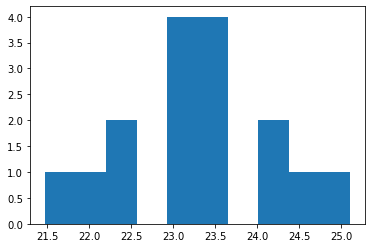

In [108]:
plt.hist(df["val_loss"])

## 3.3 Jednowymairowe zależności


### 3.3.1 Pierwsza warstwa neurony

Text(0.5, 1.0, 'Log-Loss  as function of first_neuron')

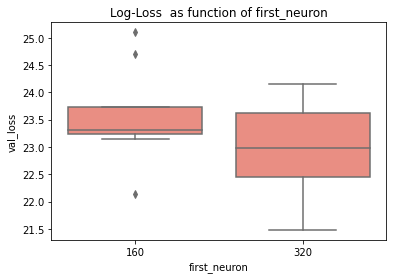

In [109]:
metric = 'first_neuron'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Log-Loss  as function of {metric}')

### 3.3.2 Liczba ukrytych neuronów

Text(0.5, 1.0, 'Log-Loss as function of hidden_neuron')

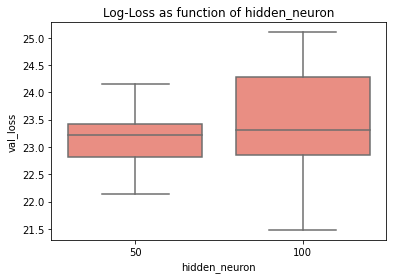

In [110]:
metric = 'hidden_neuron'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Log-Loss as function of {metric}')

### 3.3.3 Liczba ukrytych warstw

Text(0.5, 1.0, 'Validation Loss as function of hidden_layers')

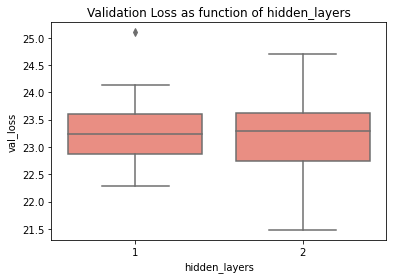

In [112]:
metric = 'hidden_layers'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')


### 3.3.4 Batch Size

Text(0.5, 1.0, 'Validation Loss as function of batch_size')

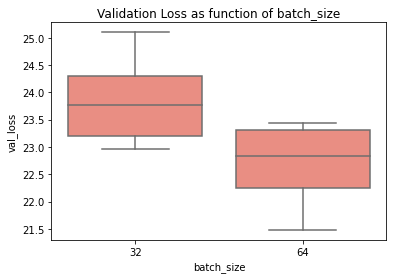

In [113]:
metric = 'batch_size'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')
